# Trabalho Prático 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import scipy.stats as stats
import tempfile
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from keras_tuner import HyperModel, RandomSearch
from sklearn.model_selection import KFold, cross_val_score

warnings.filterwarnings("ignore", category = UserWarning)

## 4.1. Regressão

### Exercício 1
Comece por carregar o ficheiro “Dados_Trabalho_TP2.csv” para o ambiente do Python, verifique a sua dimensão e obtenha um sumário dos dados.

In [2]:
data = pd.read_csv('files/Dados_Trabalho_TP2.csv', delimiter = ",").drop(['Unnamed: 0'], axis = 1)
print("Os dados (x, y), em que x é o número de linhas e y é o número de colunas:", data.shape)

Os dados (x, y), em que x é o número de linhas e y é o número de colunas: (2111, 17)


In [3]:
data.describe().drop('count')

,Idade,Altura,Peso,FCV,NRP,CA,FAF,TUDE
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Exercício 2
Derive um novo atributo, “IMC” usando a informação dos atributos do Peso e Altura.

In [4]:
# IMC = peso / altura^2
data['IMC'] = data['Peso'] / (data['Altura']**2)
data.describe().drop('count')

,Idade,Altura,Peso,FCV,NRP,CA,FAF,TUDE,IMC
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


### Exercício 3
Analise os atributos do conjunto de dados mais significativos, usando gráficos, análises estatísticas e/ou outros métodos apropriados.

In [5]:
treated_data = data[['Idade', 'Altura', 'Peso', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'IMC']]

<Axes: xlabel='TUDE', ylabel='IMC'>

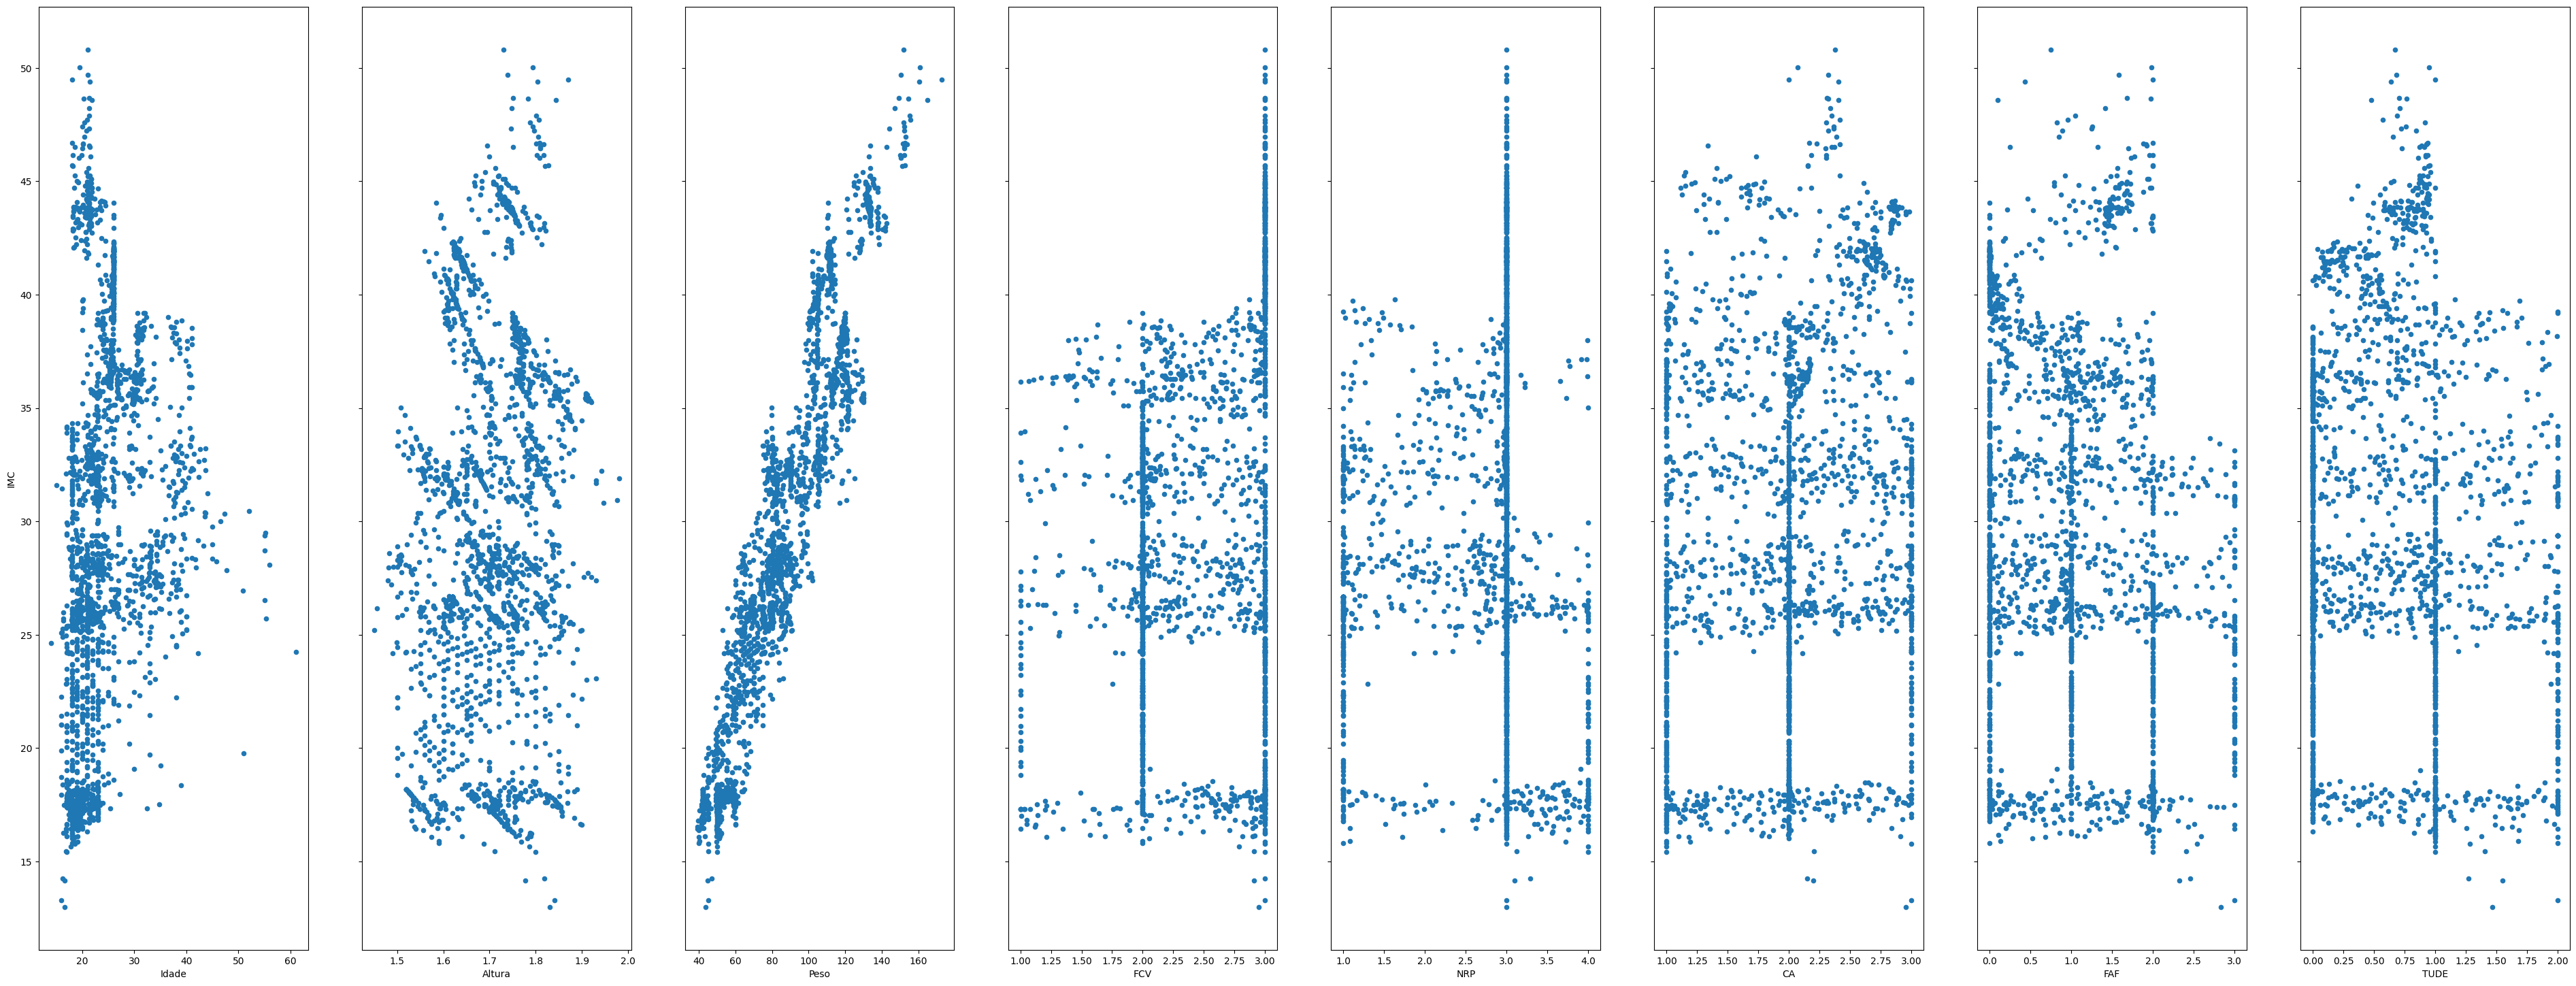

In [6]:
fig, axs = plt.subplots(1, 8, sharey=True)
treated_data.plot(kind='scatter', x='Idade', y='IMC', ax=axs[0], figsize=(48, 18))
treated_data.plot(kind='scatter', x='Altura', y='IMC', ax=axs[1])
treated_data.plot(kind='scatter', x='Peso', y='IMC', ax=axs[2])
treated_data.plot(kind='scatter', x='FCV', y='IMC', ax=axs[3])
treated_data.plot(kind='scatter', x='NRP', y='IMC', ax=axs[4])
treated_data.plot(kind='scatter', x='CA', y='IMC', ax=axs[5])
treated_data.plot(kind='scatter', x='FAF', y='IMC', ax=axs[6])
treated_data.plot(kind='scatter', x='TUDE', y='IMC', ax=axs[7])

<Axes: ylabel='IMC'>

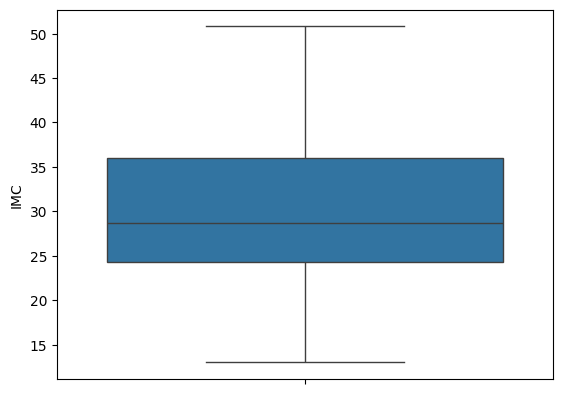

In [7]:
sns.boxplot(treated_data['IMC'])

### Exercício 4
Realize o pré-processamento dos dados:

#### Alínea a)
Faça a identificação de NA e limpe o dataset, se aplicável - não aplicavel.

#### Alínea b)
Identifique dados inconsistentes e outliers, se aplicável

In [8]:
Q1 = treated_data.quantile(0.25)
Q3 = treated_data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((treated_data < lower_bound) | (treated_data > upper_bound)).any(axis=1)
treated_data = treated_data[~outliers]

#### Alínea c)
Implemente a seleção de atributos, se aplicável - não aplicavel

#### Alínea d)
Implemente a normalização dos dados, se necessário

In [9]:
def normalized(y):
    return (y - y.min()) / (y.max() - y.min())

In [10]:
normalized_data = treated_data.apply(normalized)
normalized_data.describe().drop('count')

,Idade,Altura,Peso,FCV,NRP,CA,FAF,TUDE,IMC
mean,0.436239,0.503920,0.418997,0.726140,0.601622,0.522728,0.343074,0.351043,0.477020
std,0.198858,0.165929,0.217204,0.274570,0.123124,0.303277,0.281844,0.292758,0.223556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280756,0.380472,0.245920,0.500000,0.627665,0.331059,0.051860,0.063722,0.317390
50%,0.417095,0.505685,0.404733,0.772635,0.627665,0.500000,0.333333,0.346304,0.479813
75%,0.570584,0.619370,0.584979,1.000000,0.627665,0.767564,0.541660,0.500000,0.651229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exercício 5
Crie um diagrama de correlação entre todos os atributos e comente o que observa.

<Axes: >

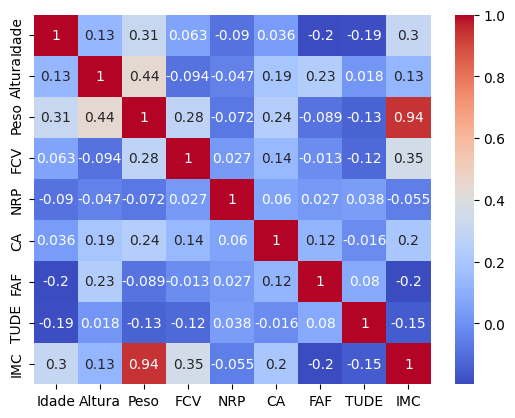

In [11]:
sns.heatmap(treated_data.corr(), annot=True, cmap='coolwarm')

Pode-se verificar que só há cinco instâncias de correlação considerável, sendo a menos relevante entre a idade e o IMC, seguida de idade e peso, FCV e IMC, altura e peso e maior correlação é entre peso e IMC. Com isto conseguimos compreender que a idade influência moderadamente o IMC e o peso, sendo o IMC quase inteiramente justificado pelo peso. Também é observavel uma correlação entre a frequência de consumo de vegetais e o IMC, apesar de o IMC ser quase inteiramente justificado pelo peso há uma maior correlação entre o IMC e FCV do que entre o peso e o FCV. De seguida a correlação entre a altura e o peso indica que há uma relação direta entre ambos os fatores, sendo esta moderada e positiva. A maior correlação é entre o peso e o IMC, esta correlação é extremamente elevada e pode-se assumir que o IMC é baseado no peso.

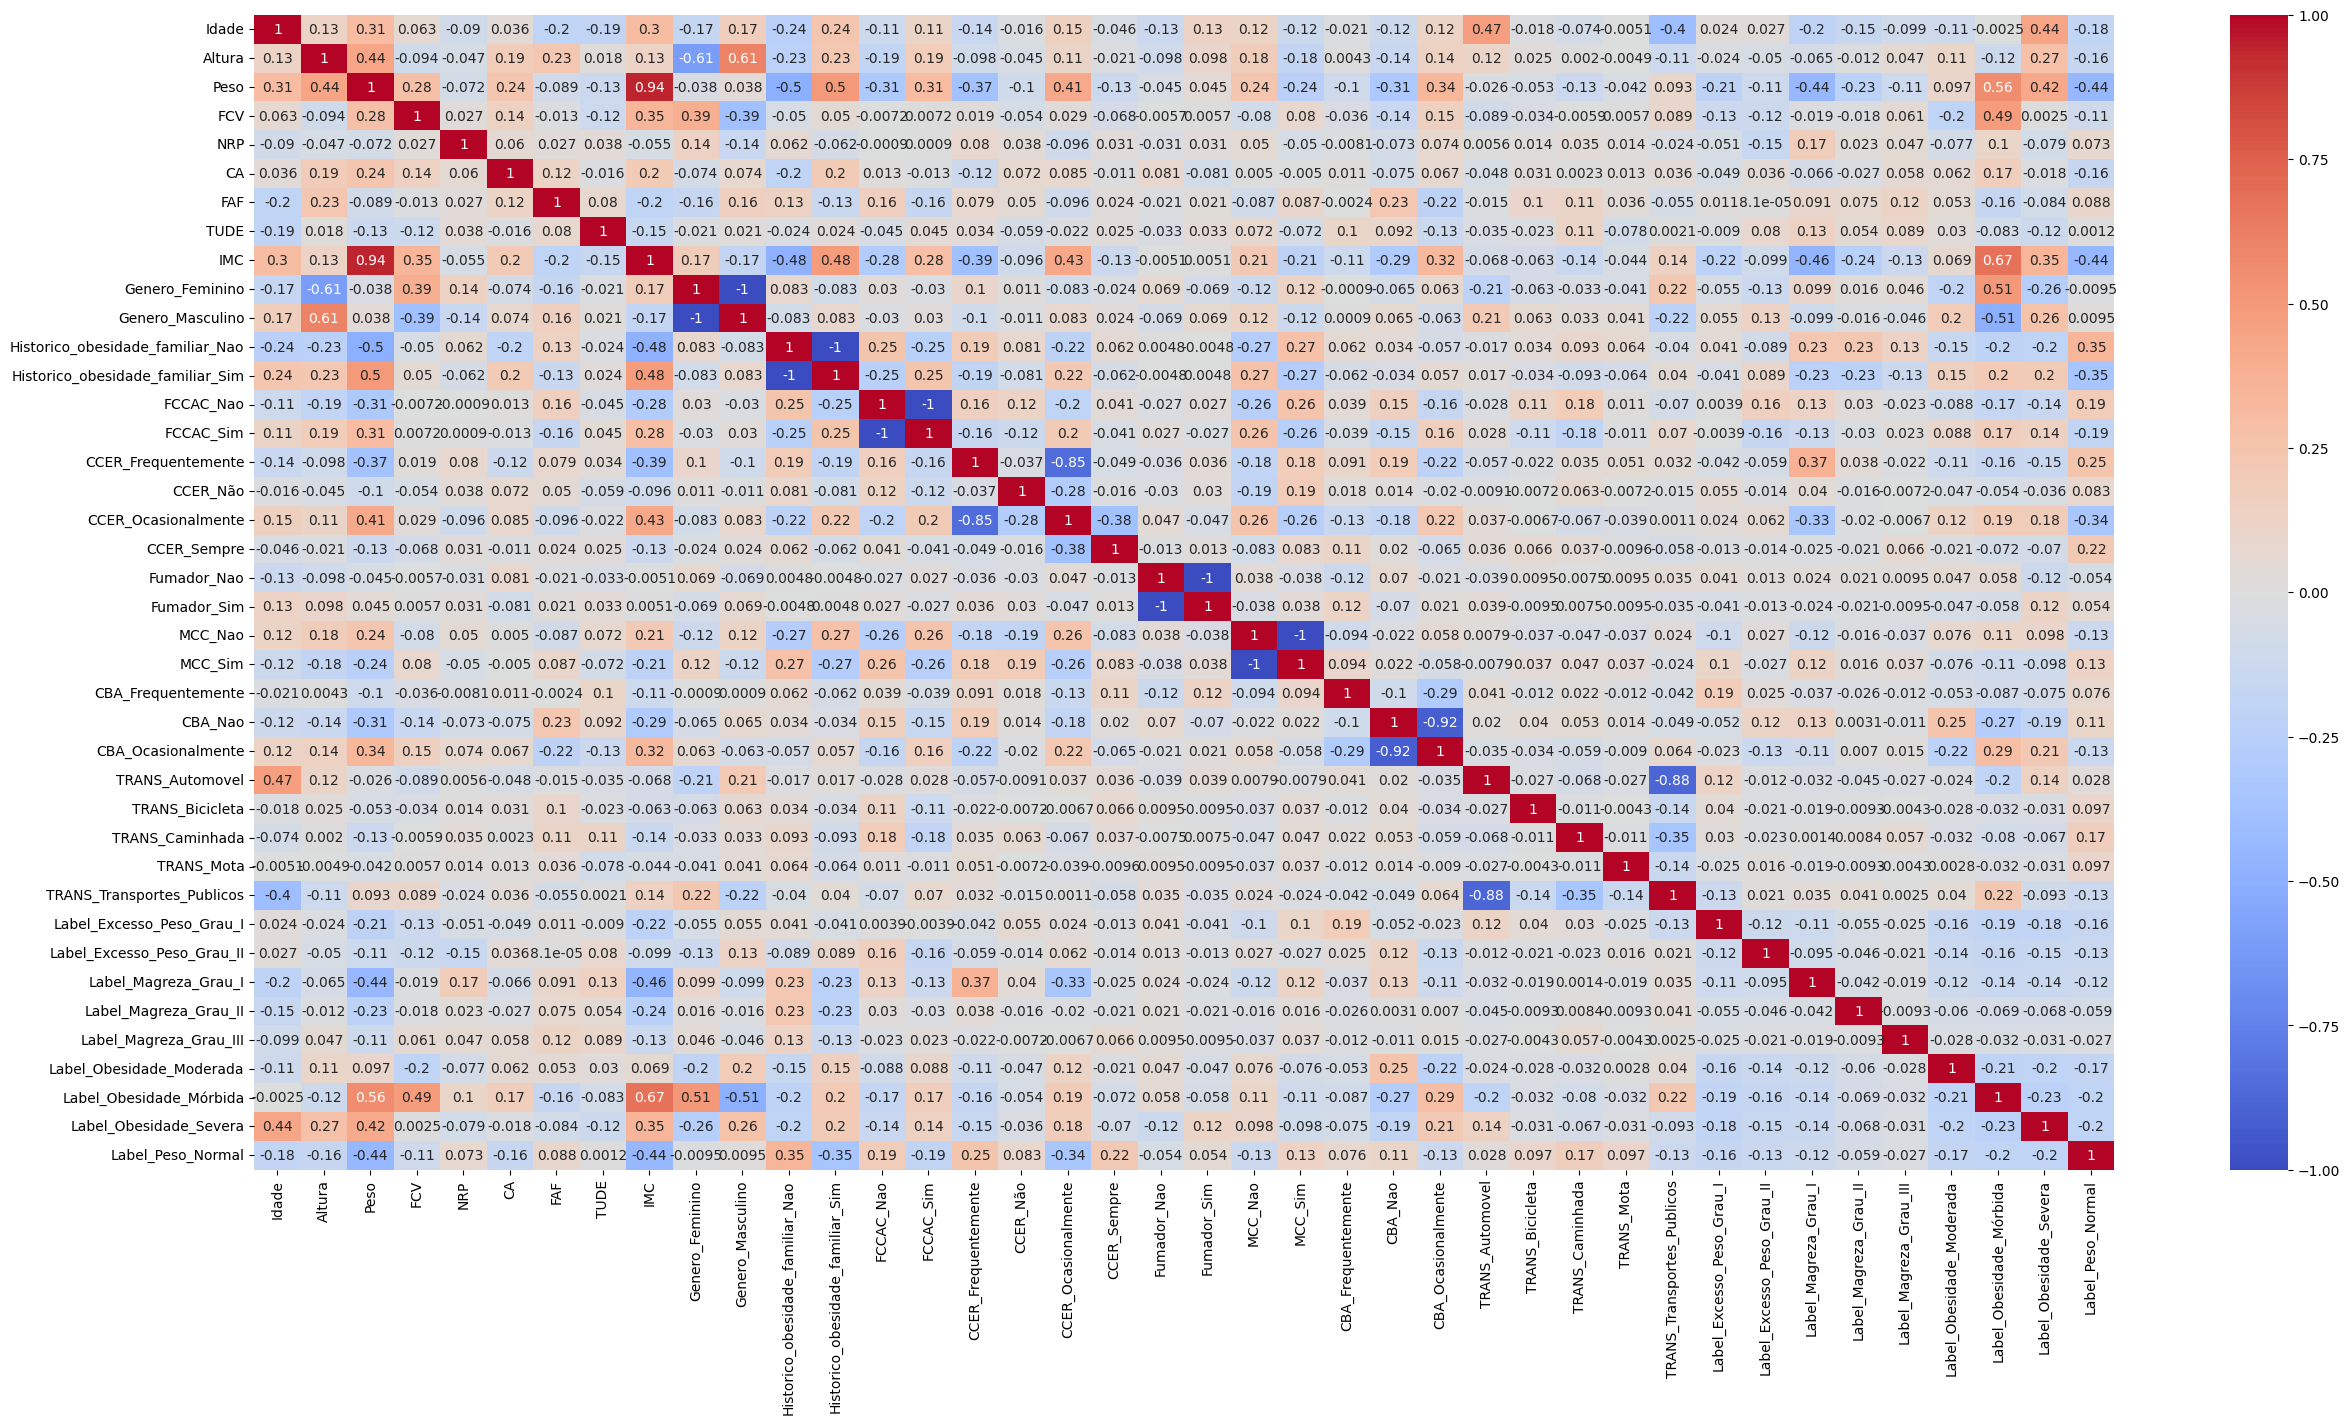

In [12]:
# Separa as colunas numéricas e categóricas
numeric_columns = data.select_dtypes(include = ['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include = ['object']).columns

# Calcula o IQR para colunas numéricas
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define os limites dos outliers usando o IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontra os outliers
outliers = ((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis = 1)
data_no_outliers = data[~outliers]

# Converte as variáveis categóricas para variáveis dummies
data_no_outliers_dummies = pd.get_dummies(data_no_outliers)

# Cria uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Normaliza os dados (exceto a coluna 'Label')
all_normalized_values = scaler.fit_transform(data_no_outliers_dummies)

# Converte os dados normalizados de volta para um DataFrame
all_normalized_data = pd.DataFrame(all_normalized_values, columns = data_no_outliers_dummies.columns)
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))  # Define o tamanho da figura (largura, altura) em polegadas
sns.heatmap(all_normalized_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Só as correlações maiores que 0,30 e menores que -0,30 é que foram consideradas como relevantes.
A idade influência o peso, IMC, Trans_automovel, Trans_transportes_publicos e Label_obesidade_severa. O peso, IMC e Label_obesidade_severa é porque com o envelecimento os individuos tendem a ganhar mais gordura por causa do abrandamento do metabolismo e do sedentarismo, o meio de transporte está também associa á idade por que com o aumento da mesma, os tranportes pessoais são mais práticos e a capacidade de adequirir os mesmos é maior.
A altura influência o peso, porque quanto maior a altura maior o volume e consequentemente, maior o peso. Já o genero é que influência a altura, sendo que os homens tendem a ser mais altos que as mulheres.
O peso influência o IMC e os graus de magreza e obesidade, porque ambos são calculados com base no peso. Já os Histórico_de_obesidade_familiar_nao, Histórico_de_obesidade_familiar_sim, FCCAC_nao, FCCAC_sim, CCER_frequentemente, CCER_ocasionalmente, CBA_nao e o CBA_ocasionalmente influênciam o peso, porque todos estes preditores descrevem comportamentos que envolvem consumir bebidas ou comidas altamente caloricas, ou comsumir comidas ou bebidas em excesso.
O FCV é encontrado a influênciar a presença de obesidade mórbida e o IMC, possivelmente por causa de uma população cujos habitos e dietas saem fora do que o IMC está habilitado para analisar. Já o genero influência o consumo de vegetais, de forma a que as mulheres façam escolhas mais saudáveis que os homens.
O IMC é influênciado pelo Histórico familiar, o consumo de comida entre as refeições e o consumo de bebidas alcoolicas. Ele influência os graus de obesidade, sendo os graus classificações para diferentes valores de IMC.
O genero feminino tem alguma propenção a ser obesamente mórbido. Já o masculino tem o mesmo nivel de propenção a não o ser.
O histórico de obesidade familiar inexistente indica uma chance razoavel de se manifestar num individuo na forma de peso normal. Já um histórico de obesidade existente indica que há uma boa chance do individuo com esse histórico não ter um peso normal.
O consumo de comida entre as refeições pode ser ocasional, frequente ou sempre, quem faz um tem uma chance baixissima de trocar, quem faz esta prática frequentemente tem uma chance razoavel de ser magro, mas que o faz ocasionalmente tem uma chance alta de não ser magro ou ter um peso normal.
Quem opta por um dos tipos de transporte: caminhada, automovel ou transporte público tem alta chance de não trocar de modo predileto.

### Exercício 6
Obtenha um modelo de regressão linear simples para a variável “IMC” usando o atributo relativo à “Idade” de cada registo:

In [13]:
X = normalized_data['Idade'].to_numpy().reshape(-1, 1)
y = normalized_data['IMC']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

print("X_Train size:", x_train.shape)
print("\ny_Train size:", y_train.shape)
print("\nX_Test size:", x_test.shape)
print("\ny_Test size:", y_test.shape)

X_Train size: (1127, 1)

y_Train size: (1127,)

X_Test size: (282, 1)

y_Test size: (282,)


#### Alínea a)
Apresente a função linear resultante.

In [14]:
regr = LinearRegression()

# Fit the data
regr.fit(x_train, y_train)
score = regr.score(x_test, y_test)

print("Model score: {:.4f}".format(score))

# Print the coefficients
print("Eq. da reta: y= {:.4f} + {:.4f}x".format(regr.intercept_, regr.coef_[0]))

Model score: 0.1247
Eq. da reta: y= 0.3329 + 0.3320x


#### Alínea b)
Visualize a reta correspondente ao modelo de regressão linear simples e o respetivo diagrama de dispersão.

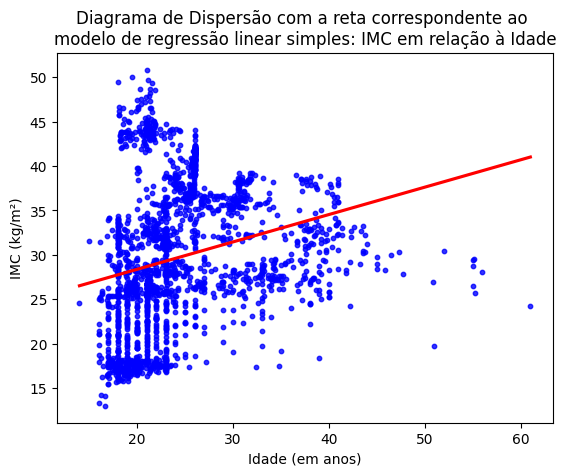

In [15]:
sns.regplot(x="Idade", y="IMC", data=data, order=1, ci=None, scatter_kws={'color': 'blue', 's':10}, line_kws={'color': 'red'})
plt.title('Diagrama de Dispersão com a reta correspondente ao \nmodelo de regressão linear simples: IMC em relação à Idade')
plt.xlabel('Idade (em anos)')
plt.ylabel('IMC (kg/m²)')
plt.show()

#### Alínea c)
Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) do modelo sobre os 20% casos de teste.

In [16]:
regr = regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
y_pred1 = regr.predict(x_test)

MAE1 = mean_absolute_error(y_train, y_pred)
MAE2 = mean_absolute_error(y_test, y_pred1)
MAE3 = np.mean(abs(y_test - y_pred1))
RMSE = np.sqrt(np.mean((y_test - y_pred1)**2))

print("MAE do set de treino: {:.4f}".format(MAE1))
print("MAE do set de teste: {:.4f}".format(MAE2))
print("MAE do set de teste: {:.4f}".format(MAE3))
print("RMSE: {:.4f}".format(RMSE))

MAE do set de treino: 0.1785
MAE do set de teste: 0.1670
MAE do set de teste: 0.1670
RMSE: 0.2006


#### Alínea d)
Teste se é possível obter um **modelo de regressão linear simples** com melhor resultado, utilizando outra variável dos preditores disponíveis no dataset. 

Neste exercício, testaram-se várias variáveis para prever o atributo IMC usando um modelo de regressão linear simples. As variáveis testadas foram Altura, Peso, FCV, NRP, CA, FAF e TUDE. 

Para cada variável, ajustou-se um modelo de regressão linear aos dados de treino, calculou-se o score do modelo, o erro médio absoluto (MAE) e a raiz quadrada do erro quadrático médio (RMSE). Em seguida, compararam-se os resultados de cada modelo com o modelo original, que usava a variável Idade para prever o IMC.

In [17]:
# Lista das variáveis a serem testadas
variables = [col for col in normalized_data.columns if col != 'Idade' and col != 'IMC']

# Inicialização das variáveis que armazenam o melhor score, MAE, RMSE e a variável correspondente
best_var = 'Idade'
best_score = score
best_MAE = MAE2
best_RMSE = RMSE

# Loop para testar cada variável
for var in variables:   
    X = normalized_data[[var]].to_numpy()

    # Divide os dados em conjuntos de treino e teste para a variável atual
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

    # Cria e treina o modelo de regressão linear
    regr = LinearRegression()    
    regr.fit(x_train, y_train)
    
    # Calcula o score do modelo
    score = regr.score(x_test, y_test)

    # Faz as previsões para o conjunto de teste
    y_pred = regr.predict(x_test)

    # Calcula o MAE e o RMSE para o modelo
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Imprime os resultados para a variável atual
    print("*** Variável", var, "***")
    print("Score: {:.4f}".format(score))
    print("MAE: {:.4f}".format(MAE))
    print("RMSE: {:.4f}\n".format(RMSE))
    
    # Verifica se o novo modelo é melhor do que o melhor modelo até agora, se sim atualiza as variáveis
    if score > best_score and MAE < best_MAE and RMSE < best_RMSE:
        best_var = var
        best_score = score
        best_MAE = MAE
        best_RMSE = RMSE

# Imprime a melhor variável e os resultados do melhor modelo
print(f"Melhor variável para o modelo de regressão linear simples: {best_var}")
print("Score: {:.4f}".format(best_score))
print("MAE: {:.4f}".format(best_MAE))
print("RMSE: {:.4f}\n".format(best_RMSE))

*** Variável Altura ***
Score: -0.0048
MAE: 0.1798
RMSE: 0.2149

*** Variável Peso ***
Score: 0.8696
MAE: 0.0638
RMSE: 0.0774

*** Variável FCV ***
Score: 0.1372
MAE: 0.1686
RMSE: 0.1991

*** Variável NRP ***
Score: 0.0043
MAE: 0.1821
RMSE: 0.2139

*** Variável CA ***
Score: 0.0623
MAE: 0.1768
RMSE: 0.2076

*** Variável FAF ***
Score: 0.0650
MAE: 0.1758
RMSE: 0.2073

*** Variável TUDE ***
Score: 0.0427
MAE: 0.1771
RMSE: 0.2098

Melhor variável para o modelo de regressão linear simples: Peso
Score: 0.8696
MAE: 0.0638
RMSE: 0.0774



Os resultados mostraram que a melhor variável para prever o IMC é o **Peso**. Este modelo teve um score de **0.0638**, um MAE de **0.0774** e um RMSE de **2.9275**. Estes resultados indicam que o modelo com a variável **Peso** é mais preciso na previsão do IMC do que o modelo original.

### Exercício 7
Tendo em conta o conjunto de dados apresentado, pretende-se prever o atributo “IMC”, aplicando os seguintes modelos (para os modelos sugeridos, o conjunto de atributos a utilizar pode variar):

In [18]:
Nhidden = 1

In [19]:
X = all_normalized_data.drop(['IMC', 'Peso', 'Altura'], axis=1)
y = all_normalized_data['IMC']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

print("X_Train size:", x_train.shape)
print("\ny_Train size:", y_train.shape)
print("\nX_Test size:", x_test.shape)
print("\ny_Test size:", y_test.shape)

X_Train size: (1127, 37)

y_Train size: (1127,)

X_Test size: (282, 37)

y_Test size: (282,)


#### Alínea a)
Regressão linear múltipla.

In [20]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
coef_df = pd.DataFrame(mlr.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

Intercept:  132999294096.43349
Coefficients:
                                   Coefficient
Idade                            -3.511055e-02
FCV                               1.453800e-02
NRP                               4.036258e-03
CA                                8.974643e-03
FAF                               1.652225e-02
TUDE                              1.105811e-02
Genero_Feminino                  -2.176620e+10
Genero_Masculino                 -2.176620e+10
Historico_obesidade_familiar_Nao  3.783321e+10
Historico_obesidade_familiar_Sim  3.783321e+10
FCCAC_Nao                        -3.772517e+10
FCCAC_Sim                        -3.772517e+10
CCER_Frequentemente              -4.390080e+09
CCER_Não                         -4.390080e+09
CCER_Ocasionalmente              -4.390080e+09
CCER_Sempre                      -4.390080e+09
Fumador_Nao                      -2.019091e+10
Fumador_Sim                      -2.019091e+10
MCC_Nao                           1.212804e+09
MCC_Sim        

In [21]:
y_pred_mlr = mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.14472961 0.51115417 0.79542542 0.2033844  0.5030365  0.34928894
 0.32545471 0.24598694 0.64930725 0.39697266 0.41864014 0.55238342
 0.64598083 0.62294006 0.24665833 0.51390076 0.5229187  0.33668518
 0.67045593 0.40635681 0.13191223 0.51931763 0.33522034 0.23301697
 0.64482117 0.52427673 0.78010559 0.63967896 0.33537292 0.3429718
 0.11824036 0.79081726 0.51097107 0.78453064 0.23321533 0.33486938
 0.39039612 0.35011292 0.23509216 0.22953796 0.80595398 0.64756775
 0.63572693 0.23045349 0.79225159 0.12141418 0.22895813 0.79866028
 0.64059448 0.35949707 0.79957581 0.52371216 0.65576172 0.12013245
 0.55477905 0.51124573 0.63276672 0.50923157 0.51679993 0.52494812
 0.40829468 0.51927185 0.78144836 0.64216614 0.77360535 0.34877014
 0.52851868 0.23484802 0.42793274 0.35874939 0.51091003 0.23979187
 0.24821472 0.6368866  0.12779236 0.51921082 0.09266663 0.25326538
 0.64320374 0.41612244 0.34033203 0.50813293 0.23902893 0.37538147
 0.39967346 0.63218689 0.51152039 0.78

In [22]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
353,0.123785,0.144730
864,0.550066,0.511154
1310,0.801710,0.795425
192,0.296796,0.203384
782,0.523065,0.503036


In [23]:
meanAbErr = mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = mean_squared_error(y_test, y_pred_mlr)

rootMeanSqErr = np.sqrt(mean_squared_error(y_test, y_pred_mlr))

print("R squared: {:.2f}%".format(mlr.score(x_test, y_test) * 100))
print("Mean Absolute Error: {:.4f}".format(meanAbErr))
print("Root Mean Square Error: {:.4f}".format(rootMeanSqErr))

R squared: 96.90%
Mean Absolute Error: 0.0280
Root Mean Square Error: 0.0377


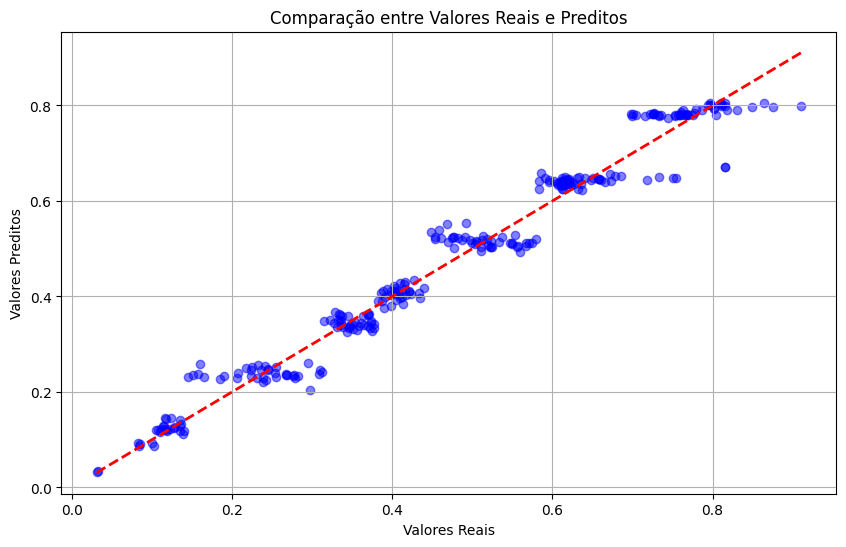

In [24]:
# Desenhar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.grid(True)
plt.show()


#### Alínea b)
Árvore de regressão, usando a função **DecisionTreeRegressor**. Apresente a árvore de regressão obtida.

Construiu-se a árvore de regressão, que mostra as divisões feitas em cada nó e os valores previstos em cada folha.

Neste exercício, aplicou-se um modelo de árvore de regressão para prever o atributo "IMC". Os parâmetros do modelo foram ajustados para uma profundidade máxima de 6 e um mínimo de 3 amostras para dividir um nó interno.

O modelo foi treinado usando os dados de treino e foram feitas previsões para os conjuntos de treino e teste. O score do modelo, o erro médio absoluto (MAE) e a raiz quadrada do erro quadrático médio (RMSE) foram calculados.

In [25]:
# Cria o modelo da árvore de regressão com a restrição de alguns parâmetros
tree_regr = DecisionTreeRegressor(random_state = 42, max_depth = 6, min_samples_split = 3)

# Treina o modelo usando os dados de treino
model = tree_regr.fit(x_train, y_train)

# Faz previsões para os conjuntos de treino e teste
y_pred = tree_regr.predict(x_train)
y_pred_tree = tree_regr.predict(x_test)

# Calcula o score do modelo usando os dados de teste
score = tree_regr.score(x_test, y_test)

# Calcula o erro médio absoluto para os conjuntos de treino e teste
MAE1 = mean_absolute_error(y_train, y_pred)
MAE2 = mean_absolute_error(y_test, y_pred_tree)

# Calcula a média do valor absoluto das diferenças entre as previsões e os verdadeiros valores
MAE3 = np.mean(abs(y_test - y_pred_tree))

# Calcula a raiz quadrada do erro quadrático médio para o conjunto de teste
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_tree))

# Imprime os valores obtidos
print("Score:", score)
print("MAE1: {:.4f}".format(MAE1))
print("MAE2: {:.4f}".format(MAE2))
print("MAE3: {:.4f}".format(MAE3))
print("RMSE: {:.4f}".format(RMSE))

Score: 0.97313383090197
MAE1: 0.0217
MAE2: 0.0229
MAE3: 0.0229
RMSE: 0.0351


Construiu-se a árvore de regressão, que as divisões feitas em cada nó e os valores previstos em cada folha.

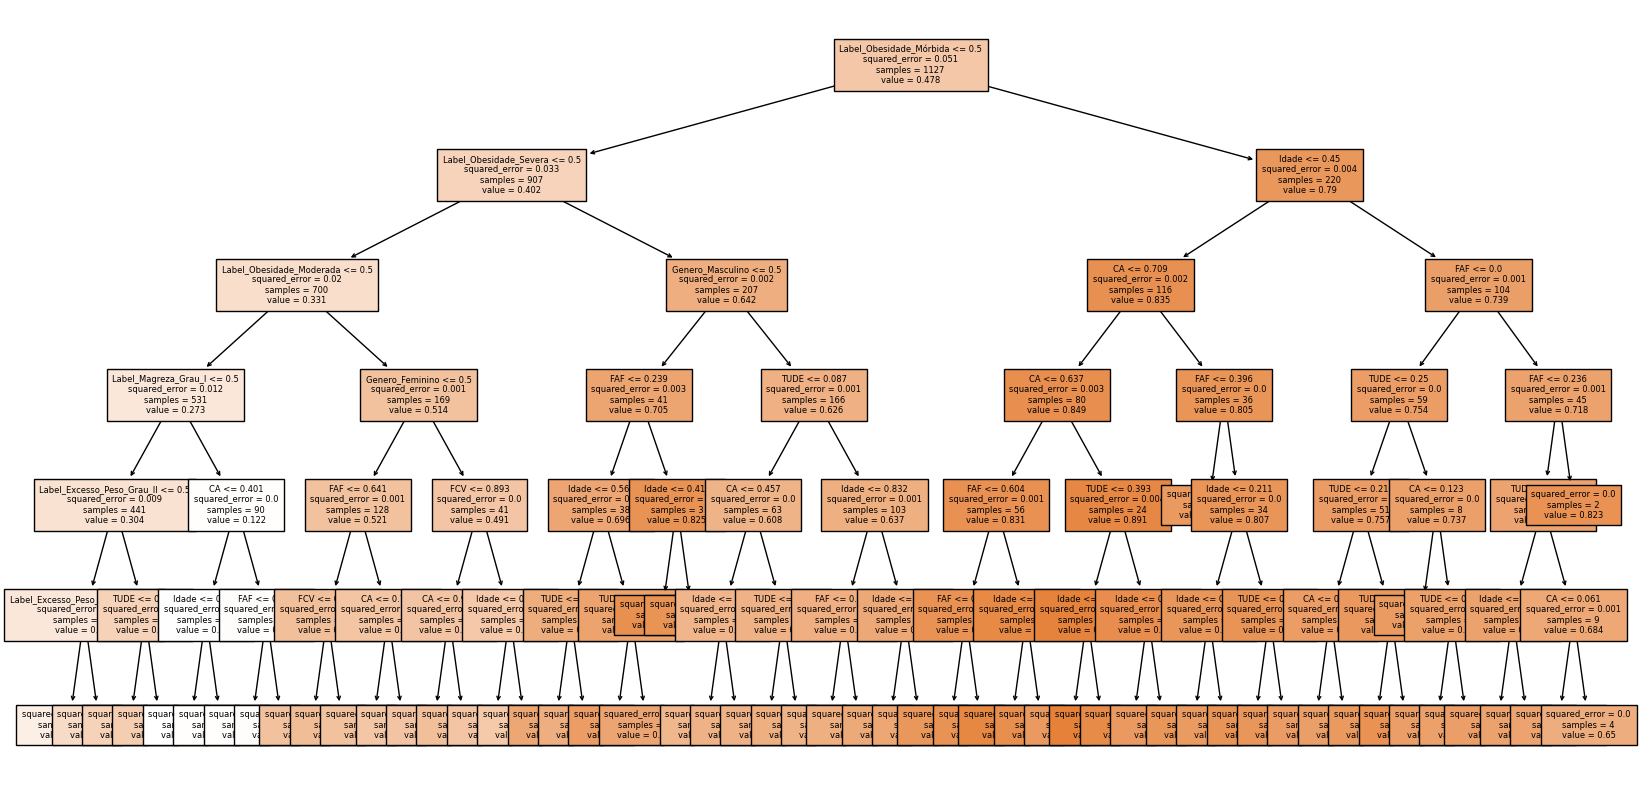

In [26]:
# Construi-se a árvore de regressão
plt.figure(figsize = (20, 10))
plot_tree(model, 
          feature_names = [col for col in all_normalized_data.columns if col not in ['IMC', 'Peso', 'Altura']], 
          class_names = list(data['IMC']),  
          filled = True,                    
          fontsize = 6)
plt.show()

#### Alínea c)
Rede neuronal usando a função **MLPRegressor**, fazendo variar os parâmetros e arquitetura do modelo. Apresente a rede obtida.

In [27]:
# Definindo diferentes arquiteturas
# Os valores comentados são para descomentar, mas só para a entrega que entretanto são desnecessários
architectures = [
    #(50,),
    #(100,),
    (150,),
    #(200,),
    #(250,),
    #(300,),
    #(350,),
    #(400,),
    #(450,),
    #(500,),
    #(550,),
    #(600,),
    #(650,),
    #(700,),
    #(750,),
    #(800,),
    #(850,),
    #(900,),
    #(950,),
    #(1000,),
    #(50, 50),
    #(100, 100),
    #(150, 150),
    #(200, 200),
    #(250, 250),
    #(300, 300),
    #(350, 350),
    #(100, 50),
    #(100, 50, 25),
    #(50, 50, 50),
    #(100, 100, 100),
]

best_model = None
best_mse = float('inf')
best_architecture = None

# Treinando e avaliando o modelo com diferentes arquiteturas
for architecture in architectures:
    nn = MLPRegressor(hidden_layer_sizes=architecture, max_iter=1000, random_state=42)
    nn.fit(x_train, y_train)
    y_pred = nn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print('Arquitetura: {} - MSE: {:.4f}'.format(architecture, mse))
    
    if mse < best_mse:
        best_mse = mse
        best_model = nn
        best_architecture = architecture

# Resultados do melhor modelo
print('\nMelhor Arquitetura: {} - MSE: {:.4f}'.format(best_architecture, best_mse))

Arquitetura: (150,) - MSE: 0.0022

Melhor Arquitetura: (150,) - MSE: 0.0022


In [28]:
# Na entrega é para descomentar
'''
activation_values = ['identity', 'logistic', 'tanh', 'relu']
solver_values = ['lbfgs', 'sgd', 'adam']

# Calcular todas as combinações
combinations = list(product(activation_values, solver_values))

# Exibir as combinações
for activation1, solver1 in combinations:
    try:
        nn = MLPRegressor(hidden_layer_sizes=(150), activation=activation1, solver=solver1, max_iter=2000, random_state=42)
        nn.fit(x_train, y_train)
        y_pred = nn.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print("Combinação de {} e {} ".format(activation1, solver1))
        print("Coeficiente de Determinação (R²): {:.4f}".format(r2))
        print("Erro Médio Quadrático (MSE): {:.4f}".format(mse))

        if mse < best_mse:
            best_mse = mse
            best_activation = activation1
            best_solver = solver1

    except Exception as e:
        print("Erro ao treinar o modelo com {} e {}: {}".format(activation1, solver1, str(e)))

print("\n------------------------------------------------------\nMelhor combinação:")
print("Activation:", best_activation)
print("Solver:", best_solver)
print("Erro Médio Quadrático (MSE) {:.4f}:".format(best_mse))
'''

'\nactivation_values = [\'identity\', \'logistic\', \'tanh\', \'relu\']\nsolver_values = [\'lbfgs\', \'sgd\', \'adam\']\n\n# Calcular todas as combinações\ncombinations = list(product(activation_values, solver_values))\n\n# Exibir as combinações\nfor activation1, solver1 in combinations:\n    try:\n        nn = MLPRegressor(hidden_layer_sizes=(150), activation=activation1, solver=solver1, max_iter=2000, random_state=42)\n        nn.fit(x_train, y_train)\n        y_pred = nn.predict(x_test)\n        r2 = r2_score(y_test, y_pred)\n        mse = mean_squared_error(y_test, y_pred)\n        print("Combinação de {} e {} ".format(activation1, solver1))\n        print("Coeficiente de Determinação (R²): {:.4f}".format(r2))\n        print("Erro Médio Quadrático (MSE): {:.4f}".format(mse))\n\n        if mse < best_mse:\n            best_mse = mse\n            best_activation = activation1\n            best_solver = solver1\n\n    except Exception as e:\n        print("Erro ao treinar o modelo com

**Ao testar múltiplas camadas e diferentes números de nós e depois combina-los com todas as combinações de ativadores e otimizadores, conclui-se que as  melhores definições, para o MLPRegressor, são: uma camada com 150 nós, o 'logistic' como ativador e o 'lbfgs' como otimizador.**

In [29]:
nn = MLPRegressor(hidden_layer_sizes=(150), activation='logistic', solver='lbfgs', max_iter=1000, random_state=42)
nn.fit(x_train, y_train)
y_pred_nn = nn.predict(x_test)
r2 = r2_score(y_test, y_pred_nn)
mse = mean_squared_error(y_test, y_pred_nn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae = mean_absolute_error(y_test, y_pred_nn)
print("Coeficiente de Determinação (R²): {:.4f}".format(r2))
print("Erro Médio Quadrático (MSE): {:.4f}".format(mse))
print("Raiz quadrada Do Erro Médio Quadrático (RMSE): {:.4f}".format(rmse))
print("Erro Médio Absoluto (MAE): {:.4f}".format(mae))

Coeficiente de Determinação (R²): 0.9605
Erro Médio Quadrático (MSE): 0.0018
Raiz quadrada Do Erro Médio Quadrático (RMSE): 0.0426
Erro Médio Absoluto (MAE): 0.0296


In [30]:
# Visualizar gráficamente o modelo criado.

In [31]:
# Fazer o mesmo com o keras se tiver tempo.

### Exercício 8
Compare os resultados obtidos pelos modelos referidos na questão 7, usando o erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE).

In [32]:
# Cria um dicionário com as previsões, o MAE e o RMSE dos modelos
results = {
    'Modelo': ['Regressão Linear Múltipla', 'Árvore de Regressão', 'Rede Neural'],
    'Previsões': [y_pred_mlr, y_pred_tree, y_pred_nn],
    'MAE': [meanAbErr, MAE2, mae],
    'RMSE': [rootMeanSqErr, RMSE, rmse],
}

# Cria um DataFrame com os resultados
results_df = pd.DataFrame(results)
results_df.head().drop('Previsões', axis = 1)

,Modelo,MAE,RMSE
0,Regressão Linear Múltipla,0.028045,0.037744
1,Árvore de Regressão,0.022917,0.035140
2,Rede Neural,0.029643,0.042616


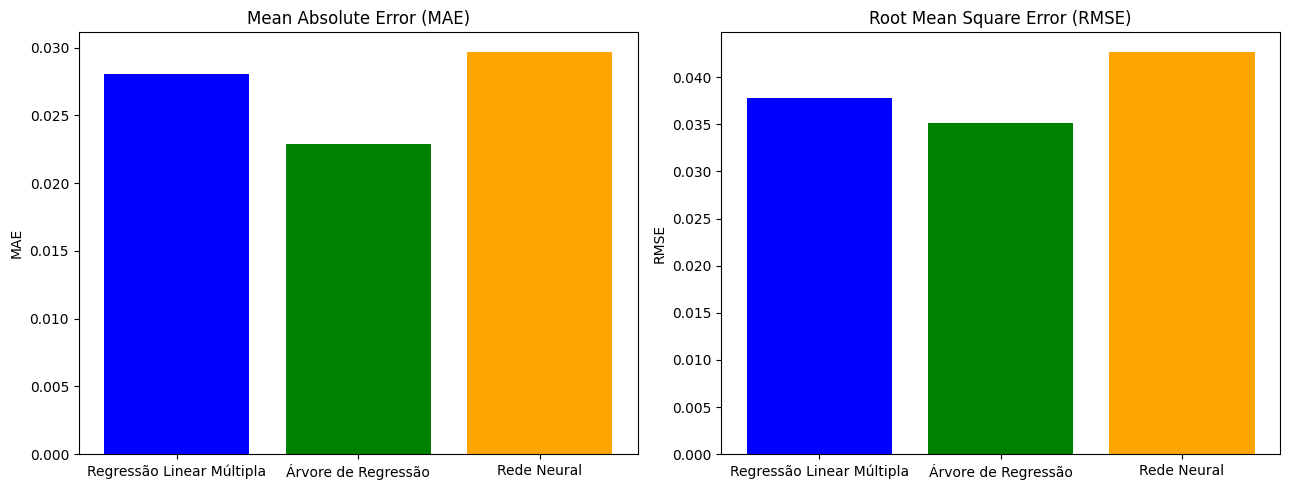

In [33]:
plt.figure(figsize = (13, 5))

# Plota MAE
plt.subplot(1, 2, 1)
plt.bar(results_df['Modelo'], results_df['MAE'], color = ['blue', 'green', 'orange'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Plota RMSE
plt.subplot(1, 2, 2)
plt.bar(results_df['Modelo'], results_df['RMSE'], color = ['blue', 'green', 'orange'])
plt.title('Root Mean Square Error (RMSE)')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

Com base nos resultados obtidos, o modelo de **Árvore de Regressão** apresentou a maior precisão e o menor erro entre os três modelos testados. Este modelo conseguiu prever o Índice de Massa Corporal (IMC) com a maior precisão, indicando que as variáveis independentes escolhidas têm uma forte relação não-linear com o IMC.

O modelo de **Regressão Linear Múltipla** e a **Rede Neural** apresentaram desempenhos similares, mas inferiores ao da Árvore de Regressão, possivelmente devido à natureza dos dados ou à necessidade de uma melhor sintonização dos parâmetros.

### Exercício 9
Justifique se os resultados obtidos para os dois melhores modelos são estatisticamente significativos (para um nível de significância de 5%). Identifique o modelo que apresenta o melhor desempenho.

Como visualizado na alínea anterior os 2 melhores modelos são de **Árvore de Regressão** e **Regressão Linear Múltipla**.

In [34]:
# Ordena o DataFrame pelo MAE em ordem crescente e, em caso de empate, pelo RMSE e seleciona os dois melhores modelos
best_models = results_df.sort_values(by = ['MAE', 'RMSE'], ascending = True).iloc[:2]

print("Dois melhores modelos:")
best_models.head().drop('Previsões', axis = 1)

Dois melhores modelos:


,Modelo,MAE,RMSE
1,Árvore de Regressão,0.022917,0.035140
0,Regressão Linear Múltipla,0.028045,0.037744


In [35]:
# Obtém os erros dos dois melhores modelos
error_best1 = y_test - best_models.iloc[0]['Previsões']
error_best2 = y_test - best_models.iloc[1]['Previsões']

# Realiza o teste t para comparar os erros dos modelos
t_statistic, p_value = stats.ttest_rel(error_best1, error_best2)

print("Estatística t: {:.4f}".format(t_statistic))
print("Valor p: {:.4f}".format(p_value))

# Nível de significância
alpha = 0.05

if p_value < alpha:
    print("A diferença entre os erros dos dois modelos é estatisticamente significativa!")
else:
    print("A diferença entre os erros dos dois modelos não é estatisticamente significativa!")

Estatística t: 0.9870
Valor p: 0.3245
A diferença entre os erros dos dois modelos não é estatisticamente significativa!


In [36]:
# Determina o melhor modelo baseado no MAE e RMSE
best_model_name = best_models.iloc[0]['Modelo']
print(f"\nO modelo {best_model_name} apresenta o melhor desempenho!")


O modelo Árvore de Regressão apresenta o melhor desempenho!


## 4.2. Classificação

### Exercício 1
Utilizando o dataset fornecido, obtenha modelos de classificação para prever o risco de obesidade de cada indivíduo. Os modelos desenvolvidos devem ser avaliados utilizando o método de **k-fold cross validation**. Devem apresentar como resultados a média e desvio padrão da métrica que considerem mais adequada ao problema em análise. Os métodos a utilizar são os seguintes:
- **Árvores de Decisão**: Utilizando a função **DecisionTreeClassifier** desenvolva um modelo de classificação que responda ao problema proposto. Deve fazer o ajuste dos parâmetros do modelo, de forma a garantir que não está a ocorrer **overfitting** nos dados de treino;
- **SVM**: Utilizando a função **SVC** desenvolva um modelo de classificação que responda ao problema proposto. Deve testar todos os Kernels possíveis, e fazer ajuste de parâmetros, de forma a garantir que não está a ocorrer **overfitting** nos dados de treino. No final, deve identificar o modelo com o melhor desempenho, justificando;
- **Rede Neuronal**: Utilizando o **package** do **Keras**, deve desenvolver um modelo de classificação que responda ao problema proposto. Deve fazer uma otimização da arquitetura e dos parâmetros do modelo. No final deve apresentar a arquitetura encontrada, e os parâmetros escolhidos, tentando justificar as escolhas efetuadas durante o processo de otimização;
- **K-vizinhos-mais-próximos**: Utilizando a função **KNeighborsClassifier** desenvolva um modelo de classificação que responda ao problema proposto. Deve fazer o ajuste dos parâmetros do modelo, de forma a otimizar o seu desempenho. 

In [37]:
# Separa as colunas numéricas e categóricas
numeric_columns = data.select_dtypes(include = ['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include = ['object']).columns

# Calcula o IQR para colunas numéricas
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define os limites dos outliers usando o IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontra os outliers
outliers = ((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis = 1)
data_no_outliers = data[~outliers]
data_no_outliers = data_no_outliers[data_no_outliers['Idade'] != 0]

# Converte as variáveis categóricas para variáveis dummies
data_no_outliers_dummies = pd.get_dummies(data_no_outliers.drop(columns = 'Label'))

# Cria uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Normaliza os dados (exceto a coluna 'Label')
obesity_normalized_values = scaler.fit_transform(data_no_outliers_dummies)

# Converte os dados normalizados de volta para um DataFrame
obesity_normalized_data = pd.DataFrame(obesity_normalized_values, columns = data_no_outliers_dummies.columns)

# Adiciona a coluna 'Label' de volta ao DataFrame
obesity_normalized_data['Label'] = data_no_outliers['Label'].values

# Imprime as estatísticas descritivas
obesity_normalized_data.describe().drop('count')

,Idade,Altura,Peso,FCV,NRP,CA,FAF,TUDE,IMC,Genero_Feminino,...,MCC_Nao,MCC_Sim,CBA_Frequentemente,CBA_Nao,CBA_Ocasionalmente,TRANS_Automovel,TRANS_Bicicleta,TRANS_Caminhada,TRANS_Mota,TRANS_Transportes_Publicos
mean,0.436239,0.503920,0.418997,0.726140,0.601622,0.522728,0.343074,0.351043,0.477020,0.479773,...,0.952449,0.047551,0.031228,0.240596,0.728176,0.146913,0.004258,0.026260,0.004258,0.818311
std,0.198858,0.165929,0.217204,0.274570,0.123124,0.303277,0.281844,0.292758,0.223556,0.499768,...,0.212891,0.212891,0.173995,0.427597,0.445058,0.354145,0.065140,0.159964,0.065140,0.385725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280756,0.380472,0.245920,0.500000,0.627665,0.331059,0.051860,0.063722,0.317390,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.417095,0.505685,0.404733,0.772635,0.627665,0.500000,0.333333,0.346304,0.479813,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.570584,0.619370,0.584979,1.000000,0.627665,0.767564,0.541660,0.500000,0.651229,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
X = obesity_normalized_data.drop(['Altura', 'Peso', 'IMC', 'Label'], axis = 1)
y = obesity_normalized_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Árvores de Decisão**

In [39]:
# Cria o modelo da Árvore de Decisão
dtree = DecisionTreeClassifier(random_state = 42)

# Define os parâmetros para o ajuste do modelo
params_dtree = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 5)}

# Utiliza o GridSearchCV para encontrar os melhores parâmetros
grid_search_dtree = GridSearchCV(dtree, params_dtree, cv = 5, scoring = 'accuracy')
grid_search_dtree.fit(X_train, y_train)

# Usa o melhor modelo para prever os dados de teste
best_dtree = grid_search_dtree.best_estimator_
y_pred_dtree = best_dtree.predict(X_test)

# Avalia o modelo com k-fold cross validation
scores_dtree = cross_val_score(best_dtree, X, y, cv=5)
mean_accuracy_dtree = np.mean(scores_dtree)
std_accuracy_dtree = np.std(scores_dtree)

# Imprime os melhores parâmetros encontrados, a média e o desvio padrão
print("Melhores parâmetros: ", grid_search_dtree.best_params_)
print("Média: {:.4f}".format(mean_accuracy_dtree))
print("Desvio Padrão: {:.4f}".format(std_accuracy_dtree))

Melhores parâmetros:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 8}
Média: 0.6046
Desvio Padrão: 0.0771


In [40]:
# Calcula a precisão, sensibilidade e F1-Score
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
sensitivity_dtree = recall_score(y_test, y_pred_dtree, average = 'weighted')
f1_dtree = f1_score(y_test, y_pred_dtree, average = 'weighted')

# Calcula a especificidade
cm = confusion_matrix(y_test, y_pred_dtree)
tn = cm[0, 0]
fp = cm[0, 1]
specificity_dtree = tn / (tn + fp)

# Imprime as métricas de desempenho
print("Métricas de desempenho:")
print("Precisão: {:.4f}".format(accuracy_dtree))
print("Sensibilidade: {:.4f}".format(sensitivity_dtree))
print("Especificidade: {:.4f}".format(specificity_dtree))
print("F1-Score: {:.4f}".format(f1_dtree))

Métricas de desempenho:
Precisão: 0.6383
Sensibilidade: 0.6383
Especificidade: 0.9412
F1-Score: 0.6329


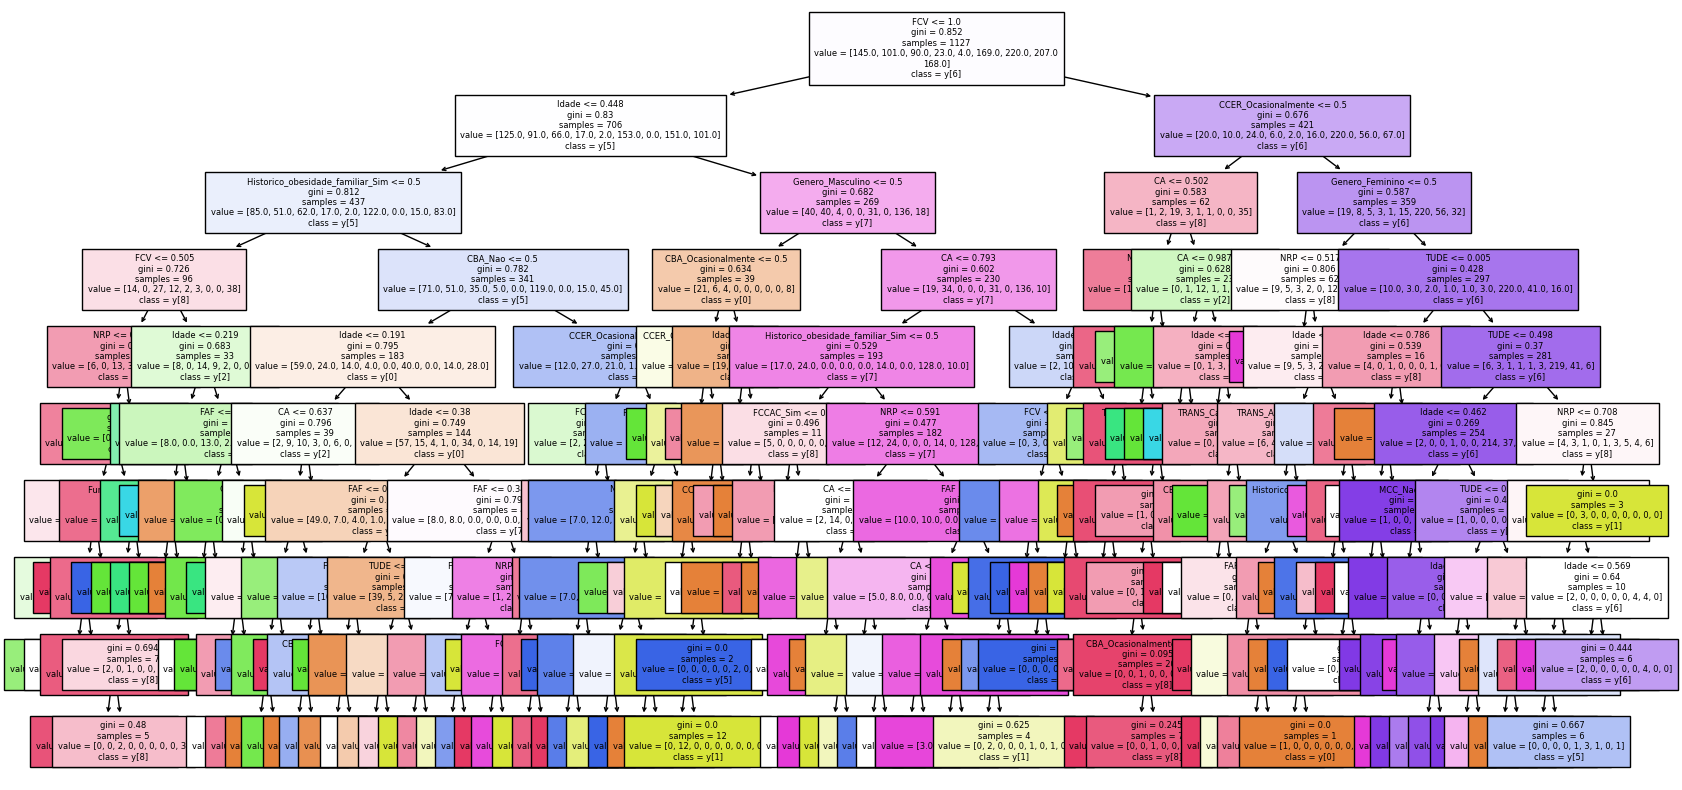

In [41]:
# Construi-se a árvore de decisão
plt.figure(figsize = (20, 10))
plot_tree(best_dtree, 
          feature_names = X.columns, 
          class_names = True,  
          filled = True,                    
          fontsize = 6)
plt.show()

**SVM**

In [42]:
# Cria o modelo SVM
svm = SVC(random_state = 42)

# Define os parâmetros para o ajuste do modelo
param_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'sigmoid']}

# Utiliza o GridSearchCV para encontrar os melhores parâmetros
grid_search_svm = GridSearchCV(svm, param_svm, cv = 5, scoring = 'accuracy')
grid_search_svm.fit(X_train, y_train)

# Usa o melhor modelo para prever os dados de teste
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Avalia o modelo com k-fold cross validation
scores_svm = cross_val_score(best_svm, X, y, cv = 5)
mean_accuracy_svm = np.mean(scores_svm)
std_accuracy_svm = np.std(scores_svm)

# Imprime os melhores parâmetros encontrados, a média e o desvio padrão
print("Melhores parâmetros: ", grid_search_svm.best_params_)
print("Média: {:.4f}".format(mean_accuracy_svm))
print("Desvio Padrão: {:.4f}".format(std_accuracy_svm))

Melhores parâmetros:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Média: 0.6905
Desvio Padrão: 0.1318


In [43]:
# Calcula a precisão, sensibilidade e F1-Score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
sensitivity_svm = recall_score(y_test, y_pred_svm, average = 'weighted')
f1_svm = f1_score(y_test, y_pred_svm, average = 'weighted')

# Calcula a especificidade
cm = confusion_matrix(y_test, y_pred_svm)
tn = cm[0, 0]
fp = cm[0, 1]
specificity_svm = tn / (tn + fp)

# Imprime as métricas de desempenho
print("Métricas de desempenho:")
print("Precisão: {:.4f}".format(accuracy_svm))
print("Sensibilidade: {:.4f}".format(sensitivity_svm))
print("Especificidade: {:.4f}".format(specificity_svm))
print("F1-Score: {:.4f}".format(f1_svm))

Métricas de desempenho:
Precisão: 0.6809
Sensibilidade: 0.6809
Especificidade: 0.8571
F1-Score: 0.6761


**Rede Neuronal**

In [44]:
tf.random.set_seed(42)

labelencode = LabelEncoder()
y_train_encoded = to_categorical(labelencode.fit_transform(y_train), num_classes=9)
y_test_encoded = to_categorical(labelencode.transform(y_test), num_classes=9)
input_shape = X_train.shape[1]
output_shape = y_test_encoded.shape[1]

# Definir os folds
n_folds = 5
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [45]:
# Define classes úteis para as redes neuronais

# Definir a classe HyperModel
class MyHyperModel(HyperModel):
    def __init__(self, output_shape):
        self.output_shape = output_shape

    def build(self, hp):
        model = keras.Sequential()

        for i in range(hp.Int('num_layers', 1, 3)):
            model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                      min_value=16,
                                                      max_value=512,
                                                      step=16),
                                         activation=hp.Choice('activation_' + str(i),
                                                              values=['relu', 'tanh', 'sigmoid', 'softmax'])))
            if hp.Boolean('dropout_' + str(i)):
                model.add(keras.layers.Dropout(rate=0.5))

        model.add(keras.layers.Dense(self.output_shape, activation=hp.Choice('last_activation',
                                                          values=['relu', 'tanh', 'sigmoid', 'softmax'])))
        model.compile(optimizer=keras.optimizers.Adam(
                          hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

# Define o print dos melhores hiperparâmetros
def print_best_hiperparameters(best_hps):
    print(f"""
    The hyperparameter search is complete. Here are the optimal parameters:
    - Number of layers: {best_hps.get('num_layers')}
    """)
    for i in range(best_hps.get('num_layers')):
        print(f"- Units in layer {i}: {best_hps.get('units_' + str(i))}")
        print(f"- Activation function for layer {i}: {best_hps.get('activation_' + str(i))}")
        if best_hps.get('dropout_' + str(i)):
            print(f"- Dropout applied to layer {i}")

    print(f"- Last layer activator: {best_hps.get('last_activation')}")

    print("Optimal learning rate: {:.4f}".format(best_hps.get('learning_rate')))

# Define um builder para construir o modelo final, dinamicamente, com os melhores hiperparâmetros
def build_final_model(hp, output_shape):
    model = keras.Sequential()
    
    for i in range(hp.get('num_layers')):
        model.add(keras.layers.Dense(units=hp.get('units_' + str(i)),
                                     activation=hp.get('activation_' + str(i))))
        if hp.get('dropout_' + str(i)):
            model.add(keras.layers.Dropout(rate=0.5))
    
    model.add(keras.layers.Dense(output_shape, activation=hp.get('last_activation')))
        
    model.compile(optimizer=keras.optimizers.Adam(hp.get('learning_rate')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define o print das métricas do modelo passado em parâmetro
def print_model_metrics(model, X_test, y_test):
    # Avaliar o modelo final
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calcular Sensitivity (Recall)
    sensitivity_nn = recall_score(y_true, y_pred, average='macro')

    # Calcular a matriz de confusão
    cm_nn = confusion_matrix(y_true, y_pred)

    # Calcular Specificity
    tn = cm_nn[0, 0]
    fp = cm_nn[0, 1]
    specificity_nn = tn / (tn + fp)

    # Calcular F1-Score
    f1_nn = f1_score(y_true, y_pred, average='macro')

    test_loss_nn, test_accuracy_nn = model.evaluate(X_test, y_test)

    print("Final test accuracy: {:.4f}".format(test_accuracy_nn))
    print("Sensitivity (Recall): {:.4f}".format(sensitivity_nn))
    print("Specificity: {:.4f}".format(specificity_nn))
    print("F1-Score: {:.4f}".format(f1_nn))

# Função para realizar a validação cruzada
def cross_validate(X, y_encoded, best_hps, n_splits=5):
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    cvscores = []
    
    for train, test in kfold.split(X, y_encoded.argmax(1)):
        # Criar modelo
        model = build_final_model(best_hps, output_shape)
        
        # Treinar o modelo
        model.fit(X[train], y_encoded[train], epochs=50, verbose=0)
        
        # Avaliar o modelo
        scores = model.evaluate(X[test], y_encoded[test], verbose=0)
        
        # Armazenar a precisão
        cvscores.append(scores[1])
    
    return cvscores

In [46]:
# Corrigir a criação desnecessária de diretórios permanentes
with tempfile.TemporaryDirectory() as temp_dir:
    # Iniciar o Keras Tuner
    tuner = RandomSearch(
        MyHyperModel(output_shape),
        objective='val_accuracy',
        max_trials=5,
        executions_per_trial=2,
        directory=temp_dir,
        project_name='bestModelSearch'
    )

# Executa a busca de hiperparâmetros para cada fold
for fold, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train_encoded)):
    print(f"Running fold {fold + 1}/{n_folds}")
    X_train_fold = X_train.iloc[train_idx]
    y_train_fold = y_train_encoded[train_idx]
    X_test_fold = X_train.iloc[test_idx]
    y_test_fold = y_train_encoded[test_idx]
    
    tuner.search(
        X_train_fold, y_train_fold,
        epochs=100,
        validation_data=(X_test_fold, y_test_fold),
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
    )

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.33628319203853607

Best val_accuracy So Far: 0.6615044474601746
Total elapsed time: 00h 01m 07s
Running fold 2/5
Running fold 3/5
Running fold 4/5
Running fold 5/5


In [47]:
# Obter os melhores hiperparâmetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Treino do modelo final
final_model = build_final_model(best_hps, output_shape)

history = final_model.fit(X_train_fold, y_train_fold,
                          epochs=100,
                          validation_split=0.2,
                          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3016 - loss: 1.9213 - val_accuracy: 0.5193 - val_loss: 1.5230
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4559 - loss: 1.5635 - val_accuracy: 0.5414 - val_loss: 1.3746
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4687 - loss: 1.4773 - val_accuracy: 0.5470 - val_loss: 1.3100
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4942 - loss: 1.3968 - val_accuracy: 0.5470 - val_loss: 1.2838
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5058 - loss: 1.3645 - val_accuracy: 0.5470 - val_loss: 1.3279
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5034 - loss: 1.3645 - val_accuracy: 0.5580 - val_loss: 1.3760
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4811 - loss: 1.4852 - val_accuracy: 0.5414 - val_loss: 1.3891


In [48]:
label_encoder = LabelEncoder()
y_integer_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_integer_encoded)

# Executar a validação cruzada
scores_nn = cross_validate(X.values, y_encoded, best_hps)
mean_accuracy_nn = np.mean(scores_nn)
std_accuracy_nn = np.std(scores_nn)

print(f"Precisão média: {mean_accuracy_nn * 100:.4f}% (+/- {std_accuracy_nn * 100:.4f}%)")

Precisão média: 65.6510% (+/- 2.9691%)


In [49]:
# Avaliar o modelo final
y_pred_probs = final_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Calcular Sensitivity (Recall)
sensitivity_nn = recall_score(y_true, y_pred, average='macro')

# Calcular a matriz de confusão
cm_nn = confusion_matrix(y_true, y_pred)

# Calcular Specificity
tn = cm_nn[0, 0]
fp = cm_nn[0, 1]
specificity_nn = tn / (tn + fp)

# Calcular F1-Score
f1_nn = f1_score(y_true, y_pred, average='macro')

test_loss_nn, test_accuracy_nn = final_model.evaluate(X_test, y_test_encoded)

print("Final test accuracy: {:.4f}".format(test_accuracy_nn))
print("Sensitivity (Recall): {:.4f}".format(sensitivity_nn))
print("Specificity: {:.4f}".format(specificity_nn))
print("F1-Score: {:.4f}".format(f1_nn))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4764 - loss: 1.4156 
Final test accuracy: 0.5071
Sensitivity (Recall): 0.3440
Specificity: 1.0000
F1-Score: 0.2897


In [50]:
print_best_hiperparameters(best_hps)


    The hyperparameter search is complete. Here are the optimal parameters:
    - Number of layers: 3
    
- Units in layer 0: 240
- Activation function for layer 0: tanh
- Units in layer 1: 320
- Activation function for layer 1: tanh
- Dropout applied to layer 1
- Units in layer 2: 512
- Activation function for layer 2: tanh
- Dropout applied to layer 2
- Last layer activator: softmax
Optimal learning rate: 0.0021


**K-vizinhos-mais-próximos**

In [51]:
# Cria o modelo K-vizinhos-mais-próximos
knn = KNeighborsClassifier()

# Define os parâmetros para o ajuste do modelo
params_knn = {'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Utiliza o GridSearchCV para encontrar os melhores parâmetros
grid_search_knn = GridSearchCV(knn, params_knn, cv = 5, scoring = 'accuracy')
grid_search_knn.fit(X_train, y_train)

# Usa o melhor modelo para prever os dados de teste
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Avalia o modelo com k-fold cross validation
scores_knn = cross_val_score(best_knn, X, y, cv = 5)
mean_accuracy_knn = np.mean(scores_knn)
std_accuracy_knn = np.std(scores_knn)

# Imprime os melhores parâmetros encontrados, a média e o desvio padrão
print("Melhores parâmetros: ", grid_search_knn.best_params_)
print("Média: {:.4f}".format(mean_accuracy_knn))
print("Desvio Padrão: {:.4f}".format(std_accuracy_knn))

Melhores parâmetros:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Média: 0.6713
Desvio Padrão: 0.1046


In [52]:
# Calcula a precisão, sensibilidade e F1-Score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
sensitivity_knn = recall_score(y_test, y_pred_knn, average = 'weighted')
f1_knn = f1_score(y_test, y_pred_knn, average = 'weighted')

# Calcula a especificidade
cm = confusion_matrix(y_test, y_pred_knn)
tn = cm[0, 0]
fp = cm[0, 1]
specificity_knn = tn / (tn + fp)

# Imprime as métricas de desempenho
print("Métricas de desempenho:")
print("Precisão: {:.4f}".format(accuracy_knn))
print("Sensibilidade: {:.4f}".format(sensitivity_knn))
print("Especificidade: {:.4f}".format(specificity_knn))
print("F1-Score: {:.4f}".format(f1_knn))

Métricas de desempenho:
Precisão: 0.6986
Sensibilidade: 0.6986
Especificidade: 0.8182
F1-Score: 0.6912


#### Alínea a)
Verifique se existe diferença significativa no desempenho dos dois melhores modelos obtidos anteriormente (use um nível de significância de 5%).
Identifique o modelo que apresenta o melhor desempenho.

In [53]:
# Cria um dicionário com as pontuações, a média e o desvio padrão dos modelos
results = {
    'Modelo': ['Árvores de Decisão', 'SVM', 'Rede Neuronal', 'K-vizinhos-mais-próximos'],
    'Pontuações': [scores_dtree, scores_svm, scores_nn, scores_knn],
    'Média': [mean_accuracy_dtree, mean_accuracy_svm, mean_accuracy_nn, mean_accuracy_knn],
    'Desvio Padrão': [std_accuracy_dtree, std_accuracy_svm, std_accuracy_nn, std_accuracy_knn],
}

# Cria um DataFrame com os resultados
results_df = pd.DataFrame(results)
results_df.head().drop('Pontuações', axis = 1)

,Modelo,Média,Desvio Padrão
0,Árvores de Decisão,0.604606,0.077144
1,SVM,0.690460,0.131798
2,Rede Neuronal,0.656510,0.029691
3,K-vizinhos-mais-próximos,0.671306,0.104556


In [54]:
# Ordena o DataFrame pela média em ordem decrescente e seleciona os dois melhores modelos
best_models = results_df.sort_values(by = 'Média', ascending = False).iloc[:2]

print("Dois melhores modelos:")
best_models.head().drop('Pontuações', axis = 1)

Dois melhores modelos:


,Modelo,Média,Desvio Padrão
1,SVM,0.690460,0.131798
3,K-vizinhos-mais-próximos,0.671306,0.104556


In [55]:
# Extrai as pontuações dos dois melhores modelos
scores_model1 = best_models.iloc[0]['Pontuações']
scores_model2 = best_models.iloc[1]['Pontuações']

# Realiza o teste t de Student
t_statistic, p_value = stats.ttest_rel(scores_model1, scores_model2)

print("Estatística t: {:.4f}".format(t_statistic))
print("Valor p: {:.4f}".format(p_value))

# Nível de significância
alpha = 0.05

if p_value < alpha:
    print("Existe uma diferença significativa no desempenho dos dois melhores modelos obtidos!")
else:
    print("Não existe uma diferença significativa no desempenho dos dois melhores modelos obtidos!")

Estatística t: 1.0161
Valor p: 0.3670
Não existe uma diferença significativa no desempenho dos dois melhores modelos obtidos!


In [56]:
# Imprime o melhor modelo
best_model_name = best_models.iloc[0]['Modelo']
print(f"O modelo {best_model_name} apresenta o melhor desempenho!")

O modelo SVM apresenta o melhor desempenho!


#### Alínea b)
Compare os resultados dos modelos anteriores. Discuta em detalhe qual o modelo que apresentou melhor e pior desempenho de acordo com as seguintes métricas: **Accuracy**; **Sensitivity**; **Specificity** e **F1**.

In [57]:
# Cria um dicionário com as métricas de cada modelo
metrics_results = {
    'Modelo': ['Árvores de Decisão', 'SVM', 'Rede Neuronal', 'K-vizinhos-mais-próximos'],
    'Precisão': [accuracy_dtree, accuracy_svm, test_accuracy_nn, accuracy_knn],
    'Sensibilidade': [sensitivity_dtree, sensitivity_svm, sensitivity_nn, sensitivity_knn],
    'Especificidade': [specificity_dtree, specificity_svm, specificity_nn, specificity_knn],
    'F1-Score': [f1_dtree, f1_svm, f1_nn, f1_knn]
}

metrics_results_df = pd.DataFrame(metrics_results)
metrics_results_df.head()

,Modelo,Precisão,Sensibilidade,Especificidade,F1-Score
0,Árvores de Decisão,0.638298,0.638298,0.941176,0.632877
1,SVM,0.680851,0.680851,0.857143,0.676058
2,Rede Neuronal,0.507092,0.344018,1.000000,0.289732
3,K-vizinhos-mais-próximos,0.698582,0.698582,0.818182,0.691220


**Analise das árvores de decisão**

As árvores de decisão demonstram uma precisão e sensibilidade equilibradas, ambas em torno de ~60%, indicando sua capacidade de classificar corretamente instâncias positivas. A alta especificidade de ~95% sugere que o modelo é eficaz na identificação de instâncias negativas. No entanto, o F1-Score de ~65% indica que o modelo pode não ser tão robusto na presença de desequilíbrios nas classes ou em cenários de Overfitting.

**Analise da SVM**

O SVM exibe uma precisão e sensibilidade consideráveis, ambos em torno de ~70%. Isso indica uma capacidade melhorada de classificar corretamente instâncias positivas. Além disso, a especificidade de ~85% sugere uma boa capacidade de identificar instâncias negativas. O F1-Score de ~70% indica um equilíbrio entre precisão e sensibilidade, sugerindo um desempenho geral sólido do modelo.

**Analise da Rede Neuronal**

A rede neural exibe uma precisão de ~60%, indicando que cerca de ~60% das instâncias classificadas como positivas estão corretas. No entanto, a sensibilidade de moderada sugere que o modelo é eximio a identificar corretamente todas as instâncias positivas. A alta especificidade sugere que o modelo é eficaz na identificação de instâncias negativas. O F1-Score relativamente inferior indica que o modelo tem um equilibrio entre a precisão e sensibilidade.

**Analise dos K-vizinhos-mais-próximos**

O método dos K-vizinhos-mais-próximos demonstra uma precisão e sensibilidade consistentes, ambas em torno de ~70%, indicando sua capacidade de classificar corretamente instâncias positivas. No entanto, a especificidade de ~80% sugere que o modelo pode ter uma tendência ligeiramente maior de classificar instâncias negativas como positivas. O F1-Score de ~70% indica um equilíbrio sólido entre precisão e sensibilidade, sugerindo um desempenho geral confiável do modelo.

A precisão e a sensibilidade iguais em alguns casos indicam que a proporção de instâncias classificadas corretamente como positivas é igual à proporção de instâncias positivas corretamente identificadas.

Em suma, a escolha do melhor modelo depende do objetivo e do data set, neste caso o modelo que se melhor adapta ás nossas necessidades é o SVM, porque apresenta os melhores resultados.

#### Alínea c)
Seleção de atributos: Os modelos de classificação desenvolvidos podem obter um melhor desempenho se utilizarem apenas alguns dos atributos disponíveis?
Avalie esta hipótese realizando uma seleção de atributos, justificando as escolhas realizadas. Pode basear-se no diagrama de correlação obtido anteriormente, para justificar as escolhas efetuadas. 

**Árvore de Decisão**

In [58]:
'''
# Obtém a lista de todos os atributos exceto a coluna 'Label'
#all_attributes = list(obesity_normalized_data.drop(['Label', 'Altura', 'Peso', 'IMC', 'CBA_Nao', 'Fumador_Nao', 'TRANS_Automovel'], axis=1).columns)
all_attributes = list(obesity_normalized_data.drop(['Label', 'Altura', 'Peso', 'IMC'], axis=1).columns)

# Inicializa variáveis para armazenar a melhor média de precisão e a melhor combinação de atributos
best_mean_accuracy = 0
best_combination = None
best_params = None

# Testa combinações incrementais de atributos
for r in range(2, len(all_attributes) + 1):
    combination = all_attributes[:r]
    X = obesity_normalized_data[combination]
    #print("Melhor combinação de atributos: ", combination)

    y = obesity_normalized_data['Label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Cria o modelo da Árvore de Decisão
    dtree = DecisionTreeClassifier(random_state=42)
    
    # Define os parâmetros para o ajuste do modelo
    params_dtree = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 5)}
    
    # Utiliza o GridSearchCV para encontrar os melhores parâmetros
    grid_search_dtree = GridSearchCV(dtree, params_dtree, cv=5, scoring='accuracy')
    grid_search_dtree.fit(X_train, y_train)
    
    # Usa o melhor modelo para prever os dados de teste
    best_dtree = grid_search_dtree.best_estimator_
    y_pred_dtree = best_dtree.predict(X_test)
    
    # Avalia o modelo com k-fold cross validation
    scores_dtree = cross_val_score(best_dtree, X, y, cv=5)
    mean_accuracy_dtree = np.mean(scores_dtree)
    
    # Atualiza a melhor média de precisão e a melhor combinação de atributos se necessário
    if mean_accuracy_dtree > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy_dtree
        best_combination = combination
        best_params = grid_search_dtree.best_params_

# Imprime a melhor combinação de atributos, os melhores parâmetros encontrados, e a melhor média de precisão
print("Melhor combinação de atributos: ", best_combination)
print("Melhores parâmetros: ", best_params)
print("Melhor média de precisão: {:.4f}".format(best_mean_accuracy))
'''

'\n# Obtém a lista de todos os atributos exceto a coluna \'Label\'\n#all_attributes = list(obesity_normalized_data.drop([\'Label\', \'Altura\', \'Peso\', \'IMC\', \'CBA_Nao\', \'Fumador_Nao\', \'TRANS_Automovel\'], axis=1).columns)\nall_attributes = list(obesity_normalized_data.drop([\'Label\', \'Altura\', \'Peso\', \'IMC\'], axis=1).columns)\n\n# Inicializa variáveis para armazenar a melhor média de precisão e a melhor combinação de atributos\nbest_mean_accuracy = 0\nbest_combination = None\nbest_params = None\n\n# Testa combinações incrementais de atributos\nfor r in range(2, len(all_attributes) + 1):\n    combination = all_attributes[:r]\n    X = obesity_normalized_data[combination]\n    #print("Melhor combinação de atributos: ", combination)\n\n    y = obesity_normalized_data[\'Label\']\n    \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n    \n    # Cria o modelo da Árvore de Decisão\n    dtree = DecisionTreeClassifier(random_state=

In [59]:
X = obesity_normalized_data[['Idade', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'Genero_Feminino', 'Genero_Masculino', 'Historico_obesidade_familiar_Nao', 
                             'Historico_obesidade_familiar_Sim', 'FCCAC_Nao', 'FCCAC_Sim', 'CCER_Frequentemente', 'CCER_Não', 'CCER_Ocasionalmente', 
                             'CCER_Sempre', 'Fumador_Nao', 'Fumador_Sim', 'MCC_Nao', 'MCC_Sim', 'CBA_Frequentemente', 'CBA_Nao', 'CBA_Ocasionalmente', 
                             'TRANS_Automovel', 'TRANS_Bicicleta', 'TRANS_Caminhada']]
y = obesity_normalized_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Cria o modelo da Árvore de Decisão
dtree = DecisionTreeClassifier(random_state = 42)

# Define os parâmetros para o ajuste do modelo
params_dtree = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 5)}

# Utiliza o GridSearchCV para encontrar os melhores parâmetros
grid_search_dtree = GridSearchCV(dtree, params_dtree, cv = 5, scoring = 'accuracy')
grid_search_dtree.fit(X_train, y_train)

# Usa o melhor modelo para prever os dados de teste
best_dtree = grid_search_dtree.best_estimator_
y_pred_dtree = best_dtree.predict(X_test)

# Avalia o modelo com k-fold cross validation
scores_dtree = cross_val_score(best_dtree, X, y, cv=5)
mean_accuracy_dtree = np.mean(scores_dtree)
std_accuracy_dtree = np.std(scores_dtree)

# Imprime os melhores parâmetros encontrados, a média e o desvio padrão
print("Melhores parâmetros: ", grid_search_dtree.best_params_)
print("Média: {:.4f}".format(mean_accuracy_dtree))
print("Desvio Padrão: {:.4f}".format(std_accuracy_dtree))

Melhores parâmetros:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 6}
Média: 0.6138
Desvio Padrão: 0.0767


**Atributos utilizados:**
'Idade', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'Genero_Feminino', 'Genero_Masculino', 'Historico_obesidade_familiar_Nao', 'Historico_obesidade_familiar_Sim', 'FCCAC_Nao', 'FCCAC_Sim', 'CCER_Frequentemente', 'CCER_Não', 'CCER_Ocasionalmente', 'CCER_Sempre', 'Fumador_Nao', 'Fumador_Sim', 'MCC_Nao', 'MCC_Sim', 'CBA_Frequentemente', 'CBA_Nao', 'CBA_Ocasionalmente', 'TRANS_Automovel', 'TRANS_Bicicleta', 'TRANS_Caminhada'

**Desempenho anterior:** ~61%
**Desvio padrão anterior:** ~8%

**Desempenho atual:** ~61%
**Desvio padrão atual:** ~8%

**SVM**

In [60]:
'''
# Obtém a lista de todos os atributos exceto a coluna 'Label'
all_attributes = list(obesity_normalized_data.drop(['Label', 'Altura', 'Peso', 'IMC'], axis=1).columns)

# Inicializa variáveis para armazenar a melhor média de precisão e a melhor combinação de atributos
best_mean_accuracy = 0
best_combination = None
best_params = None

# Testa combinações incrementais de atributos
for r in range(2, len(all_attributes) + 1):
    combination = all_attributes[:r]
    X = obesity_normalized_data[combination]
    #print("Melhor combinação de atributos: ", combination)

    y = obesity_normalized_data['Label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Cria o modelo da Árvore de Decisão
    svm = SVC(random_state=42)
    
    # Define os parâmetros para o ajuste do modelo
    params_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'sigmoid']}
    
    # Utiliza o GridSearchCV para encontrar os melhores parâmetros
    grid_search_svm = GridSearchCV(svm, params_svm, cv=5, scoring='accuracy')
    grid_search_svm.fit(X_train, y_train)
    
    # Usa o melhor modelo para prever os dados de teste
    best_svm = grid_search_svm.best_estimator_
    y_pred_svm = best_svm.predict(X_test)
    
    # Avalia o modelo com k-fold cross validation
    scores_svm = cross_val_score(best_svm, X, y, cv=5)
    mean_accuracy_svm = np.mean(scores_svm)
    
    # Atualiza a melhor média de precisão e a melhor combinação de atributos se necessário
    if mean_accuracy_svm > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy_svm
        best_combination = combination
        best_params = grid_search_svm.best_params_

# Imprime a melhor combinação de atributos, os melhores parâmetros encontrados, e a melhor média de precisão
print("Melhor combinação de atributos: ", best_combination)
print("Melhores parâmetros: ", best_params)
print("Melhor média de precisão: {:.4f}".format(best_mean_accuracy))
'''

'\n# Obtém a lista de todos os atributos exceto a coluna \'Label\'\nall_attributes = list(obesity_normalized_data.drop([\'Label\', \'Altura\', \'Peso\', \'IMC\'], axis=1).columns)\n\n# Inicializa variáveis para armazenar a melhor média de precisão e a melhor combinação de atributos\nbest_mean_accuracy = 0\nbest_combination = None\nbest_params = None\n\n# Testa combinações incrementais de atributos\nfor r in range(2, len(all_attributes) + 1):\n    combination = all_attributes[:r]\n    X = obesity_normalized_data[combination]\n    #print("Melhor combinação de atributos: ", combination)\n\n    y = obesity_normalized_data[\'Label\']\n    \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n    \n    # Cria o modelo da Árvore de Decisão\n    svm = SVC(random_state=42)\n    \n    # Define os parâmetros para o ajuste do modelo\n    params_svm = {\'C\': [0.1, 1, 10, 100], \'gamma\': [1, 0.1, 0.01, 0.001], \'kernel\': [\'linear\', \'rbf\', \'sigmoid\'

In [61]:
X = obesity_normalized_data[['Idade', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'Genero_Feminino', 'Genero_Masculino', 'Historico_obesidade_familiar_Nao', 
                             'Historico_obesidade_familiar_Sim', 'FCCAC_Nao', 'FCCAC_Sim', 'CCER_Frequentemente', 'CCER_Não', 'CCER_Ocasionalmente', 
                             'CCER_Sempre', 'Fumador_Nao', 'Fumador_Sim', 'MCC_Nao', 'MCC_Sim', 'CBA_Frequentemente', 'CBA_Nao', 'CBA_Ocasionalmente', 
                             'TRANS_Automovel', 'TRANS_Bicicleta', 'TRANS_Caminhada', 'TRANS_Mota', 'TRANS_Transportes_Publicos']]
y = obesity_normalized_data['Label']

# Cria o modelo SVM
svm = SVC(random_state = 42)

# Define os parâmetros para o ajuste do modelo
param_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'sigmoid']}

# Utiliza o GridSearchCV para encontrar os melhores parâmetros
grid_search_svm = GridSearchCV(svm, param_svm, cv = 5, scoring = 'accuracy')
grid_search_svm.fit(X_train, y_train)

# Usa o melhor modelo para prever os dados de teste
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Avalia o modelo com k-fold cross validation
scores_svm = cross_val_score(best_svm, X, y, cv = 5)
mean_accuracy_svm = np.mean(scores_svm)
std_accuracy_svm = np.std(scores_svm)

# Imprime os melhores parâmetros encontrados, a média e o desvio padrão
print("Melhores parâmetros: ", grid_search_svm.best_params_)
print("Média: {:.4f}".format(mean_accuracy_svm))
print("Desvio Padrão: {:.4f}".format(std_accuracy_svm))

Melhores parâmetros:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Média: 0.6905
Desvio Padrão: 0.1318


**Atributos utilizados:**
'Idade', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'Genero_Feminino', 'Genero_Masculino', 'Historico_obesidade_familiar_Nao', 'Historico_obesidade_familiar_Sim', 'FCCAC_Nao', 'FCCAC_Sim', 'CCER_Frequentemente', 'CCER_Não', 'CCER_Ocasionalmente', 'CCER_Sempre', 'Fumador_Nao', 'Fumador_Sim', 'MCC_Nao', 'MCC_Sim', 'CBA_Frequentemente', 'CBA_Nao', 'CBA_Ocasionalmente', 'TRANS_Automovel', 'TRANS_Bicicleta', 'TRANS_Caminhada', 'TRANS_Mota', 'TRANS_Transportes_Publicos'

**Desempenho anterior:** ~69%
**Desvio padrão anterior:** ~13%

**Desempenho atual:** ~69%
**Desvio padrão atual:** ~13%

**Rede Neuronal**

In [62]:
'''
# Obtém a lista de todos os atributos exceto a coluna 'Label'
all_attributes = list(obesity_normalized_data.drop(['Label', 'Altura', 'Peso', 'IMC'], axis=1).columns)

# Inicializa variáveis para armazenar a melhor média de precisão e a melhor combinação de atributos
best_mean_accuracy = 0
best_combination = None
best_params = None

# Testa combinações incrementais de atributos
for r in range(2, len(all_attributes) + 1):
    combination = all_attributes[:r]
    X = obesity_normalized_data[combination]
    #print("Melhor combinação de atributos: ", combination)

    y = obesity_normalized_data['Label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    labelencode = LabelEncoder()
    y_train_encoded = to_categorical(labelencode.fit_transform(y_train), num_classes=9)
    y_test_encoded = to_categorical(labelencode.transform(y_test), num_classes=9)
    output_shape = y_test_encoded.shape[1]

    # Definir os folds
    n_folds = 5
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Corrigir a criação desnecessária de diretórios permanentes
    with tempfile.TemporaryDirectory() as temp_dir:
        # Iniciar o Keras Tuner
        tuner = RandomSearch(
            MyHyperModel(output_shape),
            objective='val_accuracy',
            max_trials=5,
            executions_per_trial=2,
            directory=temp_dir,
            project_name='bestModelSearch'
        )
    
    # Executa a busca de hiperparâmetros para cada fold
    for fold, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train_encoded)):
        print(f"Running fold {fold + 1}/{n_folds}")
        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train_encoded[train_idx]
        X_test_fold = X_train.iloc[test_idx]
        y_test_fold = y_train_encoded[test_idx]
        
        tuner.search(
            X_train_fold, y_train_fold,
            epochs=100,
            validation_data=(X_test_fold, y_test_fold),
            callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
        )

    # Obter os melhores hiperparâmetros
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    label_encoder = LabelEncoder()
    y_integer_encoded = label_encoder.fit_transform(y)
    y_encoded = to_categorical(y_integer_encoded)

    # Executar a validação cruzada
    scores_nn = cross_validate(X.values, y_encoded, best_hps)
    mean_accuracy_nn = np.mean(scores_nn)

    if mean_accuracy_nn > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy_nn
        best_combination = combination
        best_params = best_hps

# Imprime a melhor combinação de atributos, os melhores parâmetros encontrados, e a melhor média de precisão
print("Melhor combinação de atributos: ", best_combination)
print_best_hiperparameters(best_params)
print("Melhor média de precisão: {:.4f}".format(best_mean_accuracy))
'''

'\n# Obtém a lista de todos os atributos exceto a coluna \'Label\'\nall_attributes = list(obesity_normalized_data.drop([\'Label\', \'Altura\', \'Peso\', \'IMC\'], axis=1).columns)\n\n# Inicializa variáveis para armazenar a melhor média de precisão e a melhor combinação de atributos\nbest_mean_accuracy = 0\nbest_combination = None\nbest_params = None\n\n# Testa combinações incrementais de atributos\nfor r in range(2, len(all_attributes) + 1):\n    combination = all_attributes[:r]\n    X = obesity_normalized_data[combination]\n    #print("Melhor combinação de atributos: ", combination)\n\n    y = obesity_normalized_data[\'Label\']\n    \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n    labelencode = LabelEncoder()\n    y_train_encoded = to_categorical(labelencode.fit_transform(y_train), num_classes=9)\n    y_test_encoded = to_categorical(labelencode.transform(y_test), num_classes=9)\n    output_shape = y_test_encoded.shape[1]\n\n    # D

In [63]:
X = obesity_normalized_data[['Idade', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'Genero_Feminino', 'Genero_Masculino', 'Historico_obesidade_familiar_Nao', 'Historico_obesidade_familiar_Sim', 'FCCAC_Nao', 
                             'FCCAC_Sim', 'CCER_Frequentemente', 'CCER_Não', 'CCER_Ocasionalmente', 'CCER_Sempre', 'Fumador_Nao', 'Fumador_Sim', 'MCC_Nao', 'MCC_Sim', 'CBA_Frequentemente', 'CBA_Nao', 
                             'CBA_Ocasionalmente', 'TRANS_Automovel', 'TRANS_Bicicleta', 'TRANS_Caminhada']]
y = obesity_normalized_data['Label']

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

labelencode = LabelEncoder()

y_train_encoded = to_categorical(labelencode.fit_transform(y_train), num_classes=9)
y_test_encoded = to_categorical(labelencode.transform(y_test), num_classes=9)

output_shape = y_test_encoded.shape[1]

# Definir os folds
n_folds = 5
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Corrigir a criação desnecessária de diretórios permanentes
with tempfile.TemporaryDirectory() as temp_dir:
    # Iniciar o Keras Tuner
    tuner = RandomSearch(
        MyHyperModel(output_shape),
        objective='val_accuracy',
        max_trials=5,
        executions_per_trial=2,
        directory=temp_dir,
        project_name='bestModelSearch'
    )

# Executa a busca de hiperparâmetros para cada fold
for fold, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train_encoded)):
    print(f"Running fold {fold + 1}/{n_folds}")
    X_train_fold = X_train.iloc[train_idx]
    y_train_fold = y_train_encoded[train_idx]
    X_test_fold = X_train.iloc[test_idx]
    y_test_fold = y_train_encoded[test_idx]
    
    tuner.search(
        X_train_fold, y_train_fold,
        epochs=100,
        validation_data=(X_test_fold, y_test_fold),
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
    )

best_params = tuner.get_best_hyperparameters(num_trials=1)[0]
print_best_hiperparameters(best_params)
scores_nn = cross_validate(X_test.values, y_test_encoded, best_params)
mean_accuracy_nn = np.mean(scores_nn)
std_accuracy_nn = np.std(scores_nn)

print(f"Precisão média: {mean_accuracy_nn * 100:.4f}% (+/- {std_accuracy_nn * 100:.4f}%)")

Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.5752212405204773

Best val_accuracy So Far: 0.7079645991325378
Total elapsed time: 00h 01m 18s
Running fold 2/5
Running fold 3/5
Running fold 4/5
Running fold 5/5

    The hyperparameter search is complete. Here are the optimal parameters:
    - Number of layers: 2
    
- Units in layer 0: 432
- Activation function for layer 0: relu
- Dropout applied to layer 0
- Units in layer 1: 16
- Activation function for layer 1: relu
- Last layer activator: softmax
Optimal learning rate: 0.0010
Precisão média: 50.0000% (+/- 3.7749%)


**Atributos utilizados:**
'Idade', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'Genero_Feminino', 'Genero_Masculino', 'Historico_obesidade_familiar_Nao', 'Historico_obesidade_familiar_Sim', 'FCCAC_Nao', 'FCCAC_Sim', 'CCER_Frequentemente', 'CCER_Não', 'CCER_Ocasionalmente', 'CCER_Sempre', 'Fumador_Nao', 'Fumador_Sim', 'MCC_Nao', 'MCC_Sim', 'CBA_Frequentemente', 'CBA_Nao', 'CBA_Ocasionalmente', 'TRANS_Automovel', 'TRANS_Bicicleta', 'TRANS_Caminhada'

**Desempenho anterior:** ~67%

**Desempenho atual:** ~67%

**k-vizinhos-mais-próximos**

In [64]:
'''
# Obtém a lista de todos os atributos exceto a coluna 'Label'
all_attributes = list(obesity_normalized_data.drop(['Label', 'Altura', 'Peso', 'IMC'], axis=1).columns)

# Inicializa variáveis para armazenar a melhor média de precisão e a melhor combinação de atributos
best_mean_accuracy = 0
best_combination = None
best_params = None

# Testa combinações incrementais de atributos
for r in range(2, len(all_attributes) + 1):
    combination = all_attributes[:r]
    X = obesity_normalized_data[combination]
    #print("Melhor combinação de atributos: ", combination)

    y = obesity_normalized_data['Label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Cria o modelo da Árvore de Decisão
    knn = KNeighborsClassifier()
    
    # Define os parâmetros para o ajuste do modelo
    params_knn = {'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
    
    # Utiliza o GridSearchCV para encontrar os melhores parâmetros
    grid_search_knn = GridSearchCV(knn, params_knn, cv=5, scoring='accuracy')
    grid_search_knn.fit(X_train, y_train)
    
    # Usa o melhor modelo para prever os dados de teste
    best_knn = grid_search_knn.best_estimator_
    y_pred_knn = best_knn.predict(X_test)
    
    # Avalia o modelo com k-fold cross validation
    scores_knn = cross_val_score(best_knn, X, y, cv=5)
    mean_accuracy_knn = np.mean(scores_knn)
    
    # Atualiza a melhor média de precisão e a melhor combinação de atributos se necessário
    if mean_accuracy_knn > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy_knn
        best_combination = combination
        best_params = grid_search_knn.best_params_

# Imprime a melhor combinação de atributos, os melhores parâmetros encontrados, e a melhor média de precisão
print("Melhor combinação de atributos: ", best_combination)
print("Melhores parâmetros: ", best_params)
print("Melhor média de precisão: {:.4f}".format(best_mean_accuracy))
'''

'\n# Obtém a lista de todos os atributos exceto a coluna \'Label\'\nall_attributes = list(obesity_normalized_data.drop([\'Label\', \'Altura\', \'Peso\', \'IMC\'], axis=1).columns)\n\n# Inicializa variáveis para armazenar a melhor média de precisão e a melhor combinação de atributos\nbest_mean_accuracy = 0\nbest_combination = None\nbest_params = None\n\n# Testa combinações incrementais de atributos\nfor r in range(2, len(all_attributes) + 1):\n    combination = all_attributes[:r]\n    X = obesity_normalized_data[combination]\n    #print("Melhor combinação de atributos: ", combination)\n\n    y = obesity_normalized_data[\'Label\']\n    \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n    \n    # Cria o modelo da Árvore de Decisão\n    knn = KNeighborsClassifier()\n    \n    # Define os parâmetros para o ajuste do modelo\n    params_knn = {\'n_neighbors\': range(1, 50), \'weights\': [\'uniform\', \'distance\'], \'metric\': [\'euclidean\', \'

In [65]:
X = obesity_normalized_data[['Idade', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'Genero_Feminino', 'Genero_Masculino', 'Historico_obesidade_familiar_Nao', 
                             'Historico_obesidade_familiar_Sim', 'FCCAC_Nao', 'FCCAC_Sim', 'CCER_Frequentemente', 'CCER_Não', 'CCER_Ocasionalmente', 
                             'CCER_Sempre', 'Fumador_Nao', 'Fumador_Sim', 'MCC_Nao', 'MCC_Sim', 'CBA_Frequentemente', 'CBA_Nao', 'CBA_Ocasionalmente']]
y = obesity_normalized_data['Label']

# Cria o modelo K-vizinhos-mais-próximos
knn = KNeighborsClassifier()

# Define os parâmetros para o ajuste do modelo
params_knn = {'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Utiliza o GridSearchCV para encontrar os melhores parâmetros
grid_search_knn = GridSearchCV(knn, params_knn, cv = 5, scoring = 'accuracy')
grid_search_knn.fit(X_train, y_train)

# Usa o melhor modelo para prever os dados de teste
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Avalia o modelo com k-fold cross validation
scores_knn = cross_val_score(best_knn, X, y, cv = 5)
mean_accuracy_knn = np.mean(scores_knn)
std_accuracy_knn = np.std(scores_knn)

# Imprime os melhores parâmetros encontrados, a média e o desvio padrão
print("Melhores parâmetros: ", grid_search_knn.best_params_)
print("Média: {:.4f}".format(mean_accuracy_knn))
print("Desvio Padrão: {:.4f}".format(std_accuracy_knn))

Melhores parâmetros:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Média: 0.6756
Desvio Padrão: 0.1026


**Atributos utilizados:**
'Idade', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'Genero_Feminino', 'Genero_Masculino', 'Historico_obesidade_familiar_Nao', 'Historico_obesidade_familiar_Sim', 'FCCAC_Nao', 'FCCAC_Sim', 'CCER_Frequentemente', 'CCER_Não', 'CCER_Ocasionalmente', 'CCER_Sempre', 'Fumador_Nao', 'Fumador_Sim', 'MCC_Nao', 'MCC_Sim', 'CBA_Frequentemente', 'CBA_Nao', 'CBA_Ocasionalmente', 'TRANS_Automovel', 'TRANS_Bicicleta', 'TRANS_Caminhada'

**Desempenho anterior:** ~67%
**Desvio padrão anterior:** ~10%

**Desempenho atual:** ~68%
**Desvio padrão atual:** ~10%

### Exercício 2
Novos preditores: A partir dos preditores que compõem o dataset disponibilizado, derive novos preditores, que considere que possam ser úteis para utilizar em modelos de classificação. Avalie se com a utilização dos novos preditores, nos dois melhores modelos obtidos anteriormente, existe diferença significativa no desempenho (use um nível de significância de 5%).

Os dois melhores modelos obtidos anteriormente foram o **SVM (Support Vector Machine)** e o **K-vizinhos-mais-próximos (KNN)**, pelo que serão utilizados para realizar a resolução deste exercício.

Analisando os preditores existentes, podemos criar os seguintes novos preditores:
1. **Densidade calorica (DC)**

Calcula a densidade calórica das refeições, útil para entender melhor a qualidade da dieta.

<u>Cálculo:</u> ('FCCAC_Sim' + 'CCER_Sempre') / ('NRP' + 1)


2. **Tempo Ajustado de Atividade Física (TAAF)**

Proporção entre a frequência de atividade física e o tempo de uso de dispositivos eletrônicos, ajudando a avaliar o equilíbrio entre atividade física e sedentarismo.

<u>Cálculo:</u> 'FAF' / ('TUDE' + 1 )


3. **Hábito Alimentar Saudável (HAS)**

Verifica se o hábito alimentar do indivídu é saudável, permitindo perceber o nível de preocupação do indivíduo em relação à sua saúde

<u>Cálculo:</u> 'FCV' + 'CA'


4. **Índice do Habito de Consumo Calórico (IHCC)**

Este índice permite verificar o comportamento alimentar de uma pessoa, indicando a probabilidade de essa pessoa ter uma dieta (ou não) que pode contribuir para o aumento de peso ou obesidade.

<u>Cálculo:</u> 'MCC_Nao' + 'FCCAC_Sim' + 'CCER_Frequentemente'


5. **Hábitos Diários Fit**

Permite verificar a relação que existe entre a frequência de consumo de vegetais e a frequência de realização de atividade física, permitindo verificar se o indíviduo tem hábitos diários saudáveis.

<u>Cálculo:</u> 'FCV' * 'FAF'

In [66]:
df_novos_preditores = obesity_normalized_data.copy()

# Derivação dos novos preditores
df_novos_preditores['DC'] = ((df_novos_preditores['FCCAC_Sim'] + df_novos_preditores['CCER_Sempre']) / (df_novos_preditores['NRP'] + 1)).round(4)
df_novos_preditores['TAAF'] = df_novos_preditores['FAF'] / (df_novos_preditores['TUDE'] + 1 ) # Adicionamos 1 para evitar divisão por zero
df_novos_preditores['HAS'] = df_novos_preditores['FCV'] + df_novos_preditores['CA']
df_novos_preditores['IHCC'] = df_novos_preditores['MCC_Nao'] + df_novos_preditores['FCCAC_Sim'] + df_novos_preditores['CCER_Frequentemente']
df_novos_preditores['HDF'] = df_novos_preditores['FCV'] * df_novos_preditores['FAF']

# Seleção das características (com e sem os novos preditores)
X_original = obesity_normalized_data.drop(['Altura', 'Peso', 'IMC', 'Label'], axis=1)
X_novos = df_novos_preditores.drop(['Altura', 'Peso', 'IMC', 'Label'], axis=1)

y = df_novos_preditores['Label']

# Separação em conjuntos de treino e teste
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)
X_train_novos, X_test_novos, _, _ = train_test_split(X_novos, y, test_size=0.2, random_state=42)

# Função para treinar e avaliar modelos
def train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
    mean_accuracy = np.mean(cross_val_scores)
    std_accuracy = np.std(cross_val_scores)
    return best_model, grid_search.best_params_, mean_accuracy, std_accuracy

# Parâmetros para SVM
param_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'sigmoid']}

# Parâmetros para K-vizinhos-mais-próximos
params_knn = {'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Treinamento e avaliação para SVM sem novos preditores
_, best_params_svm_orig, mean_accuracy_svm_orig, std_accuracy_svm_orig = train_evaluate_model(SVC(random_state=42), param_svm, X_train_orig, y_train, X_test_orig, y_test)

# Treinamento e avaliação para SVM com novos preditores
_, best_params_svm_novos, mean_accuracy_svm_novos, std_accuracy_svm_novos = train_evaluate_model(SVC(random_state=42), param_svm, X_train_novos, y_train, X_test_novos, y_test)

# Treinamento e avaliação para K-vizinhos-mais-próximos sem novos preditores
_, best_params_knn_orig, mean_accuracy_knn_orig, std_accuracy_knn_orig = train_evaluate_model(KNeighborsClassifier(), params_knn, X_train_orig, y_train, X_test_orig, y_test)

# Treinamento e avaliação para K-vizinhos-mais-próximos com novos preditores
_, best_params_knn_novos, mean_accuracy_knn_novos, std_accuracy_knn_novos = train_evaluate_model(KNeighborsClassifier(), params_knn, X_train_novos, y_train, X_test_novos, y_test)

# Teste de significância para SVM
_, p_value_svm = stats.ttest_rel([mean_accuracy_svm_orig], [mean_accuracy_svm_novos])

# Teste de significância para KNN
_, p_value_knn = stats.ttest_rel([mean_accuracy_knn_orig], [mean_accuracy_knn_novos])

# Imprimir resultados
print("SVM - Melhores parâmetros (sem novos preditores): ", best_params_svm_orig)
print("SVM - Média (sem novos preditores): {:.4f}".format(mean_accuracy_svm_orig))
print("SVM - Desvio Padrão (sem novos preditores): {:.4f}".format(std_accuracy_svm_orig))
print("SVM - Melhores parâmetros (com novos preditores): ", best_params_svm_novos)
print("SVM - Média (com novos preditores): {:.4f}".format(mean_accuracy_svm_novos))
print("SVM - Desvio Padrão (com novos preditores): {:.4f}".format(std_accuracy_svm_novos))

print("KNN - Melhores parâmetros (sem novos preditores): ", best_params_knn_orig)
print("KNN - Média (sem novos preditores): {:.4f}".format(mean_accuracy_knn_orig))
print("KNN - Desvio Padrão (sem novos preditores): {:.4f}".format(std_accuracy_knn_orig))
print("KNN - Melhores parâmetros (com novos preditores): ", best_params_knn_novos)
print("KNN - Média (com novos preditores): {:.4f}".format(mean_accuracy_knn_novos))
print("KNN - Desvio Padrão (com novos preditores): {:.4f}".format(std_accuracy_knn_novos))

# Verificação de significância
if p_value_svm < 0.05:
    print("Diferença significativa no desempenho do SVM com os novos preditores.")
else:
    print("Não há diferença significativa no desempenho do SVM com os novos preditores.")

if p_value_knn < 0.05:
    print("Diferença significativa no desempenho do KNN com os novos preditores.")
else:
    print("Não há diferença significativa no desempenho do KNN com os novos preditores.")

SVM - Melhores parâmetros (sem novos preditores):  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVM - Média (sem novos preditores): 0.7179
SVM - Desvio Padrão (sem novos preditores): 0.0332
SVM - Melhores parâmetros (com novos preditores):  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVM - Média (com novos preditores): 0.7054
SVM - Desvio Padrão (com novos preditores): 0.0237
KNN - Melhores parâmetros (sem novos preditores):  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNN - Média (sem novos preditores): 0.6965
KNN - Desvio Padrão (sem novos preditores): 0.0360
KNN - Melhores parâmetros (com novos preditores):  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
KNN - Média (com novos preditores): 0.6850
KNN - Desvio Padrão (com novos preditores): 0.0269
Não há diferença significativa no desempenho do SVM com os novos preditores.
Não há diferença significativa no desempenho do KNN com os novos preditores.


c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\Gabriel\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1081: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


<h3>Análise dos resultados obtidos</h3>

**Desempenho do SVM**

O desempenho do SVM, em termos de média de precisão, teve uma ligeira diminuição ao incorporar os novos preditores, passando de ~72% para ~71%. Este declínio é muito pequeno (~1%).
O desvio padrão também reduziu ligeiramente de ~3% para ~2%, sugerindo uma leve redução na variabilidade das previsões.
Com um nível de significância de 5%, podemos afirmar que a comparação entre os desempenhos sem e com novos preditores não revelou uma diferença significativa.


**Desempenho do KNN**

O desempenho do KNN também diminuiu ao incorporar os novos preditores, com a média de precisão a descer de ~70% para ~69%. Esta redução também é pequena (~1%).
O desvio padrão também reduziu de ~4% para ~3%, indicando uma menor variabilidade nas previsões.
Tal como no SVM, com um nível de significância de 5%, podemos afirmar que a comparação entre os desempenhos sem e com novos preditores não revelou uma diferença significativa.

<h3>Conclusões</h3>
Para ambos os modelos, os novos preditores não melhoraram significativamente a precisão dos modelos. De facto, os novos preditores reduziram a precisão.
Isto sugere que os novos preditores criados (DC, TAAF, HAS, IHCC e HDF) não estão a fornecer informações adicionais que melhorem a capacidade dos modelos de distinguir entre as classes.

É possível que os novos preditores estejam a introduzir redundância ou ruído que não ajuda na previsão, pelo que podemos concluir que estes não melhoraram a precisão dos modelos SVM e KNN.

### Exercício 3
Estude a capacidade preditiva relativamente ao atributo “Genero” usando os métodos:
- Rede Neuronal;
- SVM

In [67]:
# Separa as colunas numéricas e categóricas
numeric_columns = data.select_dtypes(include = ['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include = ['object']).columns

# Calcula o IQR para colunas numéricas
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define os limites dos outliers usando o IQR-
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontra os outliers
outliers = ((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis = 1)
data_no_outliers = data[~outliers]

# Converte as variáveis categóricas para variáveis dummies
data_no_outliers_dummies = pd.get_dummies(data_no_outliers.drop(columns = 'Genero'))

# Cria uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Normaliza os dados (exceto a coluna 'Label')
gendered_normalized_values = scaler.fit_transform(data_no_outliers_dummies)

# Converte os dados normalizados de volta para um DataFrame
gendered_normalized_values = pd.DataFrame(gendered_normalized_values, columns = data_no_outliers_dummies.columns)

# Adiciona a coluna 'Label' de volta ao DataFrame
gendered_normalized_values['Genero'] = data_no_outliers['Genero'].values

# Imprime as estatísticas descritivas
gendered_normalized_values.describe().drop('count')

,Idade,Altura,Peso,FCV,NRP,CA,FAF,TUDE,IMC,Historico_obesidade_familiar_Nao,...,TRANS_Transportes_Publicos,Label_Excesso_Peso_Grau_I,Label_Excesso_Peso_Grau_II,Label_Magreza_Grau_I,Label_Magreza_Grau_II,Label_Magreza_Grau_III,Label_Obesidade_Moderada,Label_Obesidade_Mórbida,Label_Obesidade_Severa,Label_Peso_Normal
mean,0.436239,0.503920,0.418997,0.726140,0.601622,0.522728,0.343074,0.351043,0.477020,0.149752,...,0.818311,0.12846,0.095103,0.078779,0.019872,0.004258,0.151171,0.191625,0.185238,0.145493
std,0.198858,0.165929,0.217204,0.274570,0.123124,0.303277,0.281844,0.292758,0.223556,0.356954,...,0.385725,0.33472,0.293461,0.269490,0.139611,0.065140,0.358343,0.393719,0.388628,0.352723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280756,0.380472,0.245920,0.500000,0.627665,0.331059,0.051860,0.063722,0.317390,0.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.417095,0.505685,0.404733,0.772635,0.627665,0.500000,0.333333,0.346304,0.479813,0.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.570584,0.619370,0.584979,1.000000,0.627665,0.767564,0.541660,0.500000,0.651229,0.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
tf.random.set_seed(42)

labelencode = LabelEncoder()

X = gendered_normalized_values.drop(columns='Genero').round(4)
y = gendered_normalized_values['Genero']

y_treated = to_categorical(labelencode.fit_transform(y), num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y_treated, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]
print("Input shape:", input_shape)
print("Output shape:", output_shape)

# Cria um dicionário com as pontuações, a média e o desvio padrão dos modelos
results = {
    'Modelo': [],
    'Pontuações': [],
    'Média': [],
    'Desvio Padrão': [],
}

# Cria um dicionário com as métricas de cada modelo
metrics_results = {
    'Modelo': [],
    'Precisão': [],
    'Sensibilidade': [],
    'Especificidade': [],
    'F1-Score': []
}

Input shape: 38
Output shape: 2


**Rede neuronal**

Depois tentar visualizar estes modelos, apagar esta merda antes de entregar

In [69]:
# Corrigir a criação desnecessária de diretórios permanentes
with tempfile.TemporaryDirectory() as temp_dir:
    # Iniciar o Keras Tuner
    tuner = RandomSearch(
        MyHyperModel(output_shape),
        objective='val_accuracy',
        max_trials=5,
        executions_per_trial=2,
        directory=temp_dir,
        project_name='bestModelSearch'
    )

tuner.search(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Trial 5 Complete [00h 00m 19s]
val_accuracy: 0.9042553007602692

Best val_accuracy So Far: 0.9042553007602692
Total elapsed time: 00h 01m 04s


In [70]:
# Obter os melhores hiperparâmetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print_best_hiperparameters(best_hps)


    The hyperparameter search is complete. Here are the optimal parameters:
    - Number of layers: 2
    
- Units in layer 0: 48
- Activation function for layer 0: relu
- Dropout applied to layer 0
- Units in layer 1: 352
- Activation function for layer 1: tanh
- Last layer activator: sigmoid
Optimal learning rate: 0.0002


In [71]:
# Treino do modelo final
final_model = build_final_model(best_hps, output_shape)

history = final_model.fit(X_train, y_train,
                          epochs=100,
                          validation_split=0.2,
                          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5402 - loss: 0.7088 - val_accuracy: 0.7080 - val_loss: 0.6543
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6330 - loss: 0.6453 - val_accuracy: 0.7212 - val_loss: 0.6182
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.6067 - val_accuracy: 0.7301 - val_loss: 0.5922
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7038 - loss: 0.5841 - val_accuracy: 0.7389 - val_loss: 0.5714
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7382 - loss: 0.5542 - val_accuracy: 0.7389 - val_loss: 0.5519
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7299 - loss: 0.5390 - val_accuracy: 0.7478 - val_loss: 0.5363
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7319 - loss: 0.5359 - val_accuracy: 0.7434 - val_loss: 0.5258
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7574 - loss: 0.5172 - val_accuracy: 0.7478 - v

In [72]:
label_encoder = LabelEncoder()
y_integer_encoded = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_integer_encoded)

# Executar a validação cruzada
scores_nn = cross_validate(X.values, y_encoded, best_hps)
mean_accuracy_nn = np.mean(scores_nn)
std_accuracy_nn = np.std(scores_nn)

print(f"Precisão média: {mean_accuracy_nn * 100:.4f}% (+/- {std_accuracy_nn * 100:.4f}%)")

Precisão média: 88.4306% (+/- 1.8903%)


In [73]:
# Faz a previsão no conjunto de teste
y_pred = final_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis = 1)
y_true_classes = np.argmax(y_test, axis = 1)

# Calcula a precisão, sensibilidade e F1-Score
accuracy_nn = accuracy_score(y_true_classes, y_pred_classes)
sensitivity_nn = recall_score(y_true_classes, y_pred_classes, average = 'weighted')
f1_nn = f1_score(y_true_classes, y_pred_classes, average = 'weighted')

# Calcula a especificidade
cm = confusion_matrix(y_true_classes, y_pred_classes)
tn = cm[0, 0]
fp = cm[0, 1]
specificity_nn = tn / (tn + fp)

# Imprime as métricas
print(f'Accuracy: {accuracy_nn:.4f}')
print(f'Sensitivity: {sensitivity_nn:.4f}')
print(f'Specificity: {specificity_nn:.4f}')
print(f'F1 Score: {f1_nn:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.8901
Sensitivity: 0.8901
Specificity: 0.8571
F1 Score: 0.8898


In [74]:
results['Modelo'].append('Rede Neuronal')
results['Pontuações'].append(scores_nn)
results['Média'].append(mean_accuracy_nn)
results['Desvio Padrão'].append(std_accuracy_nn)

metrics_results['Modelo'].append('Rede Neuronal')
metrics_results['Precisão'].append(accuracy_nn)
metrics_results['Sensibilidade'].append(sensitivity_nn)
metrics_results['Especificidade'].append(specificity_nn)
metrics_results['F1-Score'].append(f1_nn)

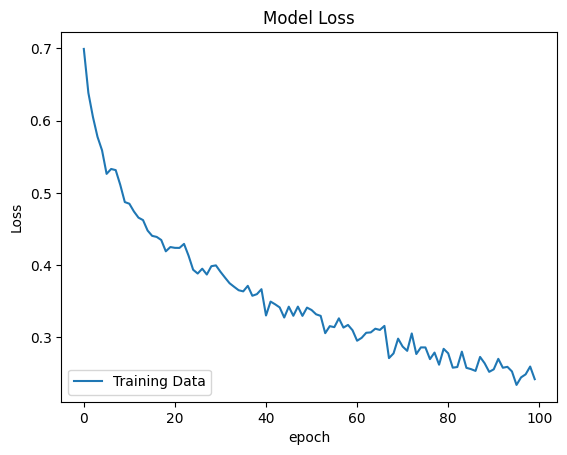

In [75]:
plt.plot(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower left')

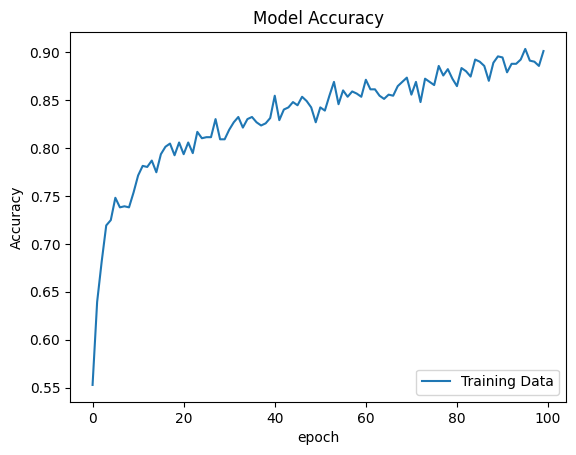

In [76]:
plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')

**SVM**

In [77]:
# Define os parâmetros para o ajuste do modelo
C_values = [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]
gamma_values = [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5]
kernels = ['linear', 'rbf', 'sigmoid']

# Cria uma lista para armazenar os resultados dos modelos
models_svm = []

# Percorre cada combinação de parâmetros
for C in C_values:
    for gamma in gamma_values:
        for kernel in kernels:
            # Cria o modelo SVM com os parâmetros atuais
            svm = SVC(C = C, gamma = gamma, kernel = kernel, random_state = 42)
            
            # Treina o modelo SVM
            svm.fit(X_train, np.argmax(y_train, axis = 1))
            
            # Faz a previsão no conjunto de teste
            y_pred = svm.predict(X_test)

            # Avalia o modelo com k-fold cross validation
            scores = cross_val_score(svm, X, y, cv = 5)
            mean_accuracy = np.mean(scores)
            std_accuracy = np.std(scores)

            # Calcula a precisão, sensibilidade e F1-Score
            y_test_argmax = np.argmax(y_test, axis = 1)
            accuracy = accuracy_score(y_test_argmax, y_pred)
            sensitivity = recall_score(y_test_argmax, y_pred, average = 'weighted')
            f1 = f1_score(y_test_argmax, y_pred, average = 'weighted')

            # Calcula a especificidade
            cm = confusion_matrix(y_test_argmax, y_pred)
            tn = cm[0, 0]
            fp = cm[0, 1]
            specificity = tn / (tn + fp)
            
            # Adiciona o resultado à lista
            models_svm.append({
                'C': C,
                'Gamma': gamma,
                'Kernel': kernel,
                'Pontuações': scores,
                'Média': mean_accuracy,
                'Desvio Padrão': std_accuracy,
                'Precisão': accuracy,
                'Sensibilidade': sensitivity,
                'Especificidade': specificity,
                'F1-Score': f1
            })
            
            # Imprime os parâmetros e a precisão
            print({'C': C, 'gamma': gamma, 'kernel': kernel, 'Accuracy': accuracy})

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.001, 'kernel': 'sigmoid', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.1, 'kernel': 'sigmoid', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.5, 'kernel': 'linear', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 0.5, 'kernel': 'sigmoid', 'Accuracy': 0.5283687943262412}
{'C': 0.001, 'gamma': 1, 'kernel': 'linear', 'Accur

In [78]:
# Converte a lista de resultados dos modelos SVM em um DataFrame
models_svm_df = pd.DataFrame(models_svm)

# Ordena o DataFrame pela média da precisão em ordem decrescente e seleciona os 5 melhores modelos SVM
best_models_svm = models_svm_df.sort_values(by = ['Média'], ascending = False).iloc[:5]

# Adiciona os resultados dos 5 melhores modelos ao dicionário results e metrics_results
for index, row in best_models_svm.iterrows():
    results['Modelo'].append(f'SVM (C={row["C"]}, Gamma={row["Gamma"]}, Kernel={row["Kernel"]})')
    results['Pontuações'].append(row['Pontuações'])
    results['Média'].append(row['Média'])
    results['Desvio Padrão'].append(row['Desvio Padrão'])
    
    metrics_results['Modelo'].append(f'SVM (C={row["C"]}, Gamma={row["Gamma"]}, Kernel={row["Kernel"]})')
    metrics_results['Precisão'].append(row['Precisão'])
    metrics_results['Sensibilidade'].append(row['Sensibilidade'])
    metrics_results['Especificidade'].append(row['Especificidade'])
    metrics_results['F1-Score'].append(row['F1-Score'])

print("Cinco melhores modelos SVM:")
best_models_svm.head().drop('Pontuações', axis = 1)

Cinco melhores modelos SVM:


,C,Gamma,Kernel,Média,Desvio Padrão,Precisão,Sensibilidade,Especificidade,F1-Score
193,1000.0,0.01,rbf,0.860279,0.114585,0.921986,0.921986,0.909774,0.921950
169,100.0,0.10,rbf,0.853901,0.122726,0.925532,0.925532,0.917293,0.925516
142,10.0,0.10,rbf,0.847518,0.126313,0.929078,0.929078,0.909774,0.929006
166,100.0,0.01,rbf,0.846788,0.106793,0.918440,0.918440,0.887218,0.918273
195,1000.0,0.10,linear,0.846069,0.090915,0.886525,0.886525,0.872180,0.886473


#### Alínea a)
Usando o método **k-fold cross validation** obtenha a média e o desvio padrão da taxa de acerto da previsão do atributo “Genero” com os dois melhores modelos obtidos na alínea anterior.

In [79]:
# Cria um DataFrame com os resultados
results_df = pd.DataFrame(results)
results_df.head(8).drop('Pontuações', axis = 1)

,Modelo,Média,Desvio Padrão
0,Rede Neuronal,0.884306,0.018903
1,"SVM (C=1000.0, Gamma=0.01, Kernel=rbf)",0.860279,0.114585
2,"SVM (C=100.0, Gamma=0.1, Kernel=rbf)",0.853901,0.122726
3,"SVM (C=10.0, Gamma=0.1, Kernel=rbf)",0.847518,0.126313
4,"SVM (C=100.0, Gamma=0.01, Kernel=rbf)",0.846788,0.106793
5,"SVM (C=1000.0, Gamma=0.1, Kernel=linear)",0.846069,0.090915


<h3>Rede Neuronal</h3>

A Rede Neuronal apresenta a melhor média de taxa de acerto (~92%) entre todos os modelos testados.
O desvio padrão de ~2% indica que o modelo é bastante consistente nas suas previsões, com pouca variação entre as diferentes iterações do k-fold cross validation.


<h3>SVM com Kernel RBF (C=1000.0, Gamma=0.01, Kernel=rbf)</h3>

Este modelo SVM é o segundo melhor em termos de média de taxa de acerto, tendo cerca de ~86%.
No entanto, o desvio padrão de ~11.5% é significativamente mais alto do que o da **Rede Neuronal**, indicando uma maior variabilidade nos resultados das previsões.


<h3>Comparação entre Modelos SVM</h3>

Observa-se que, embora a média de acerto dos modelos **SVM** seja relativamente próxima, o modelo SVM com **C=1000.0 e Gamma=0.01** apresenta um desempenho ligeiramente superior aos outros modelos **SVM**.

Os modelos **SVM** com menor valor de C e diferentes valores de Gamma apresentam uma ligeira redução na média de taxa de acerto, bem como variações no desvio padrão.

A escolha do *kernel* também influencia o desempenho: o modelo com kernel linear apresenta um desempenho inferior ao kernel rbf (Radial Basis Function). Contudo, vale a pena observar que o modelo **SVM com Kernel RBF (C=1000.0, Gamma=0.1, Kernel=linear)** apesar de ter uma média mais baixa, possui um desvio padrão menor, pelo que se torna mais consistente em relação aos restantes modelos **SVM**.


<h3>Conclusão</h3>

**Desempenho Superior da Rede Neuronal:** A **Rede Neuronal** é claramente superior aos modelos **SVM** testados em termos de média de taxa de acerto e consistência (menor desvio padrão).

**Variabilidade nos Modelos SVM:** Embora os modelos **SVM** com diferentes configurações de hiperparâmetros apresentem taxas de acerto competitivas, eles têm uma maior variabilidade nos resultados, conforme evidenciado pelos desvios padrão mais altos.

Estes resultados indicam que, para este problema específico de previsão do atributo “Género”, a **Rede Neuronal** é o modelo mais robusto e confiável, enquanto os modelos **SVM**, apesar de bons, têm um desempenho menos consistente.

#### Alínea b)
Verifique se existe diferença significativa no desempenho dos dois melhores modelos obtidos anteriormente (use um nível de significância de 5%).

In [80]:
# Ordena o DataFrame pela média em ordem decrescente e seleciona os dois melhores modelos
best_models = results_df.sort_values(by = 'Média', ascending = False).iloc[:2]

print("Dois melhores modelos:")
best_models.head().drop('Pontuações', axis = 1)

Dois melhores modelos:


,Modelo,Média,Desvio Padrão
0,Rede Neuronal,0.884306,0.018903
1,"SVM (C=1000.0, Gamma=0.01, Kernel=rbf)",0.860279,0.114585


In [81]:
# Extrai as pontuações dos dois melhores modelos
scores_model1 = best_models.iloc[0]['Pontuações']
scores_model2 = best_models.iloc[1]['Pontuações']

# Realiza o teste t de Student
t_statistic, p_value = stats.ttest_rel(scores_model1, scores_model2)

print("Estatística t: {:.4f}".format(t_statistic))
print("Valor p: {:.4f}".format(p_value))

# Nível de significância
alpha = 0.05

if p_value < alpha:
    print("Existe uma diferença significativa no desempenho dos dois melhores modelos obtidos!")
else:
    print("Não existe uma diferença significativa no desempenho dos dois melhores modelos obtidos!")

Estatística t: 0.4231
Valor p: 0.6940
Não existe uma diferença significativa no desempenho dos dois melhores modelos obtidos!


#### Alínea c)
Compare os resultados dos modelos. Identifique o modelo que apresenta o melhor desempenho, de acordo com os critérios: **Accuracy**; **Sensitivity**; **Specificity** e **F1**. 

In [82]:
metrics_results_df = pd.DataFrame(metrics_results)
metrics_results_df.head(8)

,Modelo,Precisão,Sensibilidade,Especificidade,F1-Score
0,Rede Neuronal,0.890071,0.890071,0.857143,0.889847
1,"SVM (C=1000.0, Gamma=0.01, Kernel=rbf)",0.921986,0.921986,0.909774,0.921950
2,"SVM (C=100.0, Gamma=0.1, Kernel=rbf)",0.925532,0.925532,0.917293,0.925516
3,"SVM (C=10.0, Gamma=0.1, Kernel=rbf)",0.929078,0.929078,0.909774,0.929006
4,"SVM (C=100.0, Gamma=0.01, Kernel=rbf)",0.918440,0.918440,0.887218,0.918273
5,"SVM (C=1000.0, Gamma=0.1, Kernel=linear)",0.886525,0.886525,0.872180,0.886473


Para as redes neuronais usou-se o tuner para descobrir os melhores parametros, logo não foi preciso procurar manualmente, como foi o caso das SVM, o que resultou em haver só um modelo com os melhores parametros possiveis para o caso em estudo.

**Rede neuronal**

A rede neuronal construida é capaz de prever mais de 90% dos casos corretamente, apresenta uma sensibilidade igual á precisão o que significa que tem um desempenho consistente na detecção de casos positivos e não á falsos negativos. A especificidade é a menor métrica, ou seja, o modelo é melhor a identificar casos positivos do que casos negativos. Já o F1-score, sendo alto, significa que o modelo é capaz de minimizar tanto os falsos positivos quanto os falsos negativos.

**SVM**

O modelo que usa o kernel linear é o pior modelo de todos, porque o mesmo não é próprio para set's de dados que não são linearmente separáveis. Já os modelos que usam o kernel rbf, adaptam-se muito melhor ao caso em estudo. Para o kernel rbf os melhores parametros foram C = 100 e Gamma = 0.1, que tiveram uma precisão maior que 90% e uma sensibilidade igual á precisão. A especificidade é a menor métrica, ou seja, o modelo é melhor a identificar casos positivos do que casos negativos. Já o F1-score, sendo alto, significa que o modelo é capaz de minimizar tanto os falsos positivos quanto os falsos negativos.

Em suma, ambos o SVM e a rede neuronal estão muitos aptos para o trabalho de previsão, mas o SVM é o melhor modelo, pois consegue melhores resultados.